In [ ]:
!pip install torchvision tensorboardx jupyter matplotlib numpy

     |████████████████████████████████| 204kB 2.8MB/s 


In [ ]:
import os
import torch
import pandas as pd
from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

In [ ]:
import numpy as np
import torch
from torchvision import transforms, datasets
from torch import nn, optim #neural network library , optimizer library
from torch.autograd.variable import Variable

In [ ]:
from torch.utils.data import Dataset, DataLoader

In [ ]:
from utils import Logger

In [ ]:
import shutil
shutil.copy('/content/drive/My Drive/mouth_feature.csv','/content/')
shutil.copy('/content/drive/My Drive/utils.py','/content/')

'/content/utils.py'

In [ ]:
from PIL import Image 

In [ ]:
!unzip '/content/drive/My Drive/mouth_images.zip' -d '/content/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/content/mouth_images/mouth/162633_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/032826_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/151134_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/196445_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/158045_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/154783_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/161957_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/009116_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/198897_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/154953_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/200462_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/199312_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/109015_mouth.jpg  
  inflating: /content/content/mouth_images/mouth/143628_mouth.jpg

**Prepare the Dataset**

In [ ]:
class MouthDataset(Dataset):
  def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.label = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

  def __len__(self):
      return len(self.label)

  def __getitem__(self, idx):

      if torch.is_tensor(idx):
          idx = idx.tolist()

      img_name = os.path.join(self.root_dir,
                                self.label.iloc[idx, 0])
      image = Image.open(img_name)
      label = self.label.iloc[idx, 1:]
      label = np.array(label,dtype=int)
      if self.transform:
          image = self.transform(image)

      sample = {'image': image, 'label': label}


      return sample

In [ ]:
root = '/content/mouth_images/mouth/'
csv = '/content/mouth_feature.csv'

In [ ]:
transform = transforms.Compose([
                                transforms.Resize((16,32)),
                                transforms.ToTensor(),
                                transforms.Normalize((.5,0.5,0.5),(.5,0.5,0.5)),
                    
])
mouth_dataset = MouthDataset(csv_file=csv,
                                    root_dir=root,transform = transform)

In [ ]:
mouth_dataset[0]

{'image': tensor([[[ 0.5137,  0.4667,  0.4431,  ...,  0.6549,  0.6078,  0.5843],
          [ 0.4118,  0.3882,  0.4118,  ...,  0.6392,  0.5922,  0.5765],
          [ 0.3725,  0.3255,  0.3490,  ...,  0.5686,  0.5608,  0.5373],
          ...,
          [ 0.7882,  0.7647,  0.7412,  ...,  0.6627,  0.7098,  0.7333],
          [ 0.7412,  0.7412,  0.7255,  ...,  0.6549,  0.6863,  0.7020],
          [ 0.7412,  0.7647,  0.7333,  ...,  0.6392,  0.6706,  0.7098]],
 
         [[-0.1294, -0.1922, -0.2392,  ..., -0.2863, -0.3176, -0.3098],
          [-0.2706, -0.3020, -0.3020,  ..., -0.2941, -0.3176, -0.3098],
          [-0.3569, -0.4118, -0.4039,  ..., -0.3412, -0.3333, -0.3333],
          ...,
          [-0.1216, -0.1451, -0.1765,  ..., -0.2941, -0.2314, -0.2078],
          [-0.1608, -0.1686, -0.1843,  ..., -0.2627, -0.2078, -0.1843],
          [-0.1608, -0.1451, -0.1608,  ..., -0.2471, -0.2000, -0.1608]],
 
         [[-0.5059, -0.5529, -0.5686,  ..., -0.7333, -0.7961, -0.8039],
          [-0.6235,

In [ ]:
data_loader = torch.utils.data.DataLoader(dataset = mouth_dataset,batch_size=batch_size,shuffle=False)
data_loader

In [ ]:
for i_batch,batch in enumerate(data_loader):
  print(batch['label'][0])
  if i_batch is 5:
    break

tensor([1, 0, 0])
tensor([1, 0, 1])
tensor([0, 0, 1])
tensor([1, 0, 1])
tensor([1, 0, 0])
tensor([1, 0, 0])


In [ ]:
def Noise(batch_size,latent_dim):
  Z = torch.normal(0,1,size=(batch_size,latent_dim))
  if torch.cuda.is_available():
    Z = Z.cuda()
  return Z
Noise(2,10)

tensor([[ 0.0851, -1.0659,  0.6740, -1.7463, -1.5385,  1.4526, -0.1393, -0.4617,
          0.5613, -1.1288],
        [-1.3504,  0.3235, -0.3441, -0.2166, -0.2453, -0.5008,  1.4830,  0.5694,
         -0.6519, -0.1230]], device='cuda:0')

In [ ]:
nClasses = 3
batch_size = 128
z_size= 100

In [ ]:
def RandomLabel(size,classes):
  Z = torch.randint(0,2,(size,classes))
  if torch.cuda.is_available():
    Z = Z.cuda()
  return Z

In [ ]:
#Generator Class
#a single image shape will [batch_size,d,h,w]
class Generator(nn.Module):
  def __init__(self,nClasses=10):
    super(Generator,self).__init__()
    #self.label_emb = nn.Embedding(nClasses, nClasses)
    
    self.model = nn.Sequential(
        nn.ConvTranspose2d(z_size + nClasses,128,(2,4),bias=False),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.ConvTranspose2d(128,64,4,2,1,bias=False),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.ConvTranspose2d(64,32,4,2,1,bias=False),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.ConvTranspose2d(32,3,4,2,1,bias=False),
        nn.Tanh()
    )
    

    def setInitWeight(mean=0,std=0.02):
      for layer in self.model.children():
        if isinstance(layer,nn.ConvTranspose2d):
          nn.init.normal_(layer.weight,mean,std)
    setInitWeight(0,0.02)

  #forward function takes a Z vector and labels as input and generator fake Images
  def forward(self,Z,labels):
    #Z shape is [batch_size,1,1,100]
    #print((self.label_emb(labels).shape))
    #print(Z.shape)
    out = torch.cat((Z, labels), -1)
    out = self.model(out.view(-1,z_size + nClasses,1,1))
    return out


In [ ]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator,self).__init__()
    self.model = nn.Sequential(
        nn.Conv2d(3,32,4,2,1),
        nn.LeakyReLU(0.2),

        nn.Conv2d(32,64,4,2,1),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.2),
        
        nn.Conv2d(64,128,4,2,1),
        nn.BatchNorm2d(128) ,
        nn.LeakyReLU(0.2),

        nn.Conv2d(128,1,(2,4),1,0),
        nn.Sigmoid()
    )
    
    def setInitWeight(mean=0,std=0.2):
       for layer in self.model.children():
         if isinstance(layer,nn.ConvTranspose2d):
           nn.init.normal_(layer.weight,mean,std)
    setInitWeight(0,0.02)

  def forward(self,x):
    return self.model(x)


In [ ]:

discriminator = Discriminator()
generator = Generator(nClasses=3)

if torch.cuda.is_available(): 
  discriminator = discriminator.cuda()
  generator = generator.cuda()

In [ ]:

for i_batch,data in enumerate(data_loader):
  real_image = data['image']
  label = data['label'].float()
  if torch.cuda.is_available(): 
    real_image  = real_image.cuda()
    label = label.cuda()
  print(generator(Noise(batch_size,z_size),label)[0].shape)
  print(discriminator(real_image)[0].shape)
  break

torch.Size([3, 16, 32])
torch.Size([1, 1, 1])


In [ ]:
loss = nn.BCELoss()
if torch.cuda.is_available(): 
  loss = loss.cuda()

In [ ]:
d_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002,betas=(0.5,0.999))
g_optimizer = optim.Adam(generator.parameters(), lr=0.0001,betas=(0.5,0.999))

In [ ]:
def ones_target(size):
    '''
    Tensor containing ones, with shape = size
    '''
    data = Variable(torch.ones(size, 1,1,1))
    if torch.cuda.is_available(): return data.cuda()
    return data

def zeros_target(size):
    '''
    Tensor containing zeros, with shape = size
    '''
    data = Variable(torch.zeros(size, 1,1,1))
    if torch.cuda.is_available(): return data.cuda()
    return data

In [ ]:
def train_discriminator(optimizer, real_data, fake_data):
    N = real_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    
    # 1.1 Train on Real Data
    prediction_real = discriminator(real_data)
    # Calculate error and backpropagate
    error_real = loss(prediction_real, ones_target(N) )
    error_real.backward()

    # 1.2 Train on Fake Data
    prediction_fake = discriminator(fake_data)
    # Calculate error and backpropagate
    error_fake = loss(prediction_fake, zeros_target(N))
    error_fake.backward()
    
    # 1.3 Update weights with gradients
    optimizer.step()
    
    # Return error and predictions for real and fake inputs
    return error_real + error_fake, prediction_real, prediction_fake

In [ ]:
def train_generator(optimizer, fake_data):
    N = fake_data.size(0)
    # Reset gradients
    optimizer.zero_grad()
    # Sample noise and generate fake data
    prediction = discriminator(fake_data)
    # Calculate error and backpropagate
    error = loss(prediction, ones_target(N))
    error.backward()
    # Update weights with gradients
    optimizer.step()
    # Return error
    return error

In [ ]:
num_test_samples = 16
test_noise = Noise(num_test_samples,z_size).reshape((num_test_samples,z_size))
test_label = RandomLabel(num_test_samples,nClasses)

In [ ]:
test_label

tensor([[1, 1, 1],
        [1, 1, 0],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 1],
        [0, 1, 0],
        [1, 1, 0],
        [1, 0, 0],
        [0, 0, 0],
        [0, 0, 1],
        [1, 1, 1],
        [0, 0, 0],
        [1, 1, 0],
        [1, 0, 0],
        [1, 1, 0],
        [0, 0, 0]], device='cuda:0')

In [ ]:
print(test_noise.shape)

torch.Size([16, 100])


In [ ]:
num_batches = len(data_loader)
print(num_batches)
import time

1122


0
Epoch: [0/20], Batch Num: [0/1122]
Discriminator Loss: 0.3753, Generator Loss: 2.3774
D(x): 0.8505, D(G(z)): 0.1765
torch.Size([16, 100])


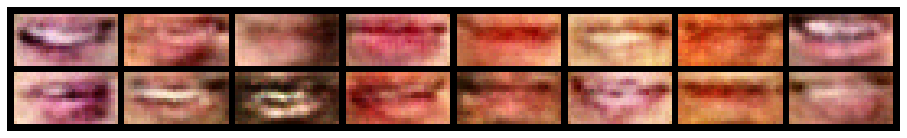

Epoch: [0/20], Batch Num: [50/1122]
Discriminator Loss: 0.4315, Generator Loss: 2.2106
D(x): 0.8162, D(G(z)): 0.1849
Epoch: [0/20], Batch Num: [100/1122]
Discriminator Loss: 0.4352, Generator Loss: 2.4415
D(x): 0.8145, D(G(z)): 0.1817
Epoch: [0/20], Batch Num: [150/1122]
Discriminator Loss: 0.5229, Generator Loss: 1.5348
D(x): 0.6931, D(G(z)): 0.1060
Epoch: [0/20], Batch Num: [200/1122]
Discriminator Loss: 0.3845, Generator Loss: 2.2750
D(x): 0.7739, D(G(z)): 0.1045
Epoch: [0/20], Batch Num: [250/1122]
Discriminator Loss: 0.5049, Generator Loss: 2.2575
D(x): 0.7226, D(G(z)): 0.1324
Epoch: [0/20], Batch Num: [300/1122]
Discriminator Loss: 0.5169, Generator Loss: 2.9543
D(x): 0.8105, D(G(z)): 0.2405
Epoch: [0/20], Batch Num: [350/1122]
Discriminator Loss: 0.4046, Generator Loss: 2.0618
D(x): 0.7513, D(G(z)): 0.0902
Epoch: [0/20], Batch Num: [400/1122]
Discriminator Loss: 0.5579, Generator Loss: 1.2635
D(x): 0.6570, D(G(z)): 0.0908
Epoch: [0/20], Batch Num: [450/1122]
Discriminator Loss: 

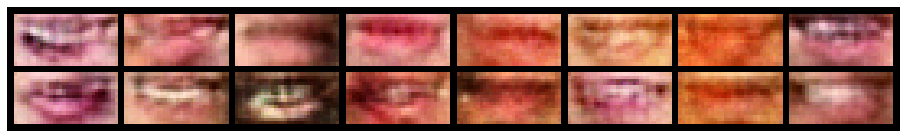

Epoch: [0/20], Batch Num: [550/1122]
Discriminator Loss: 0.4614, Generator Loss: 2.1759
D(x): 0.9038, D(G(z)): 0.2870
Epoch: [0/20], Batch Num: [600/1122]
Discriminator Loss: 0.6495, Generator Loss: 3.3527
D(x): 0.8764, D(G(z)): 0.3761
Epoch: [0/20], Batch Num: [650/1122]
Discriminator Loss: 0.6376, Generator Loss: 1.2356
D(x): 0.6237, D(G(z)): 0.1138
Epoch: [0/20], Batch Num: [700/1122]
Discriminator Loss: 0.2962, Generator Loss: 3.5714
D(x): 0.8135, D(G(z)): 0.0704
Epoch: [0/20], Batch Num: [750/1122]
Discriminator Loss: 0.4593, Generator Loss: 2.0472
D(x): 0.7547, D(G(z)): 0.1426
Epoch: [0/20], Batch Num: [800/1122]
Discriminator Loss: 0.6250, Generator Loss: 1.8142
D(x): 0.6195, D(G(z)): 0.0858
Epoch: [0/20], Batch Num: [850/1122]
Discriminator Loss: 0.5288, Generator Loss: 2.3440
D(x): 0.8037, D(G(z)): 0.2483
Epoch: [0/20], Batch Num: [900/1122]
Discriminator Loss: 0.5232, Generator Loss: 1.6413
D(x): 0.7165, D(G(z)): 0.1453
Epoch: [0/20], Batch Num: [950/1122]
Discriminator Loss:

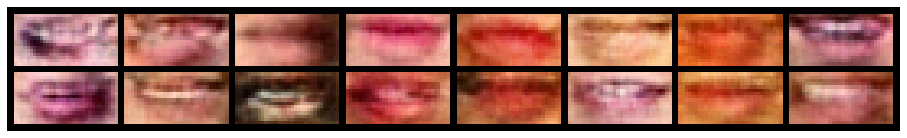

Epoch: [0/20], Batch Num: [1050/1122]
Discriminator Loss: 0.5925, Generator Loss: 2.6542
D(x): 0.8372, D(G(z)): 0.3188
Epoch: [0/20], Batch Num: [1100/1122]
Discriminator Loss: 0.4714, Generator Loss: 1.7617
D(x): 0.8267, D(G(z)): 0.2273
Time taken by 0 epoch(s) is 142.41701316833496.
1
Epoch: [1/20], Batch Num: [0/1122]
Discriminator Loss: 0.5942, Generator Loss: 1.2210
D(x): 0.7171, D(G(z)): 0.2006
torch.Size([16, 100])


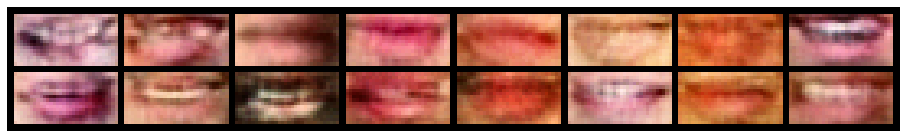

Epoch: [1/20], Batch Num: [50/1122]
Discriminator Loss: 0.5337, Generator Loss: 1.3984
D(x): 0.6732, D(G(z)): 0.0933
Epoch: [1/20], Batch Num: [100/1122]
Discriminator Loss: 0.5361, Generator Loss: 3.3999
D(x): 0.9368, D(G(z)): 0.3542
Epoch: [1/20], Batch Num: [150/1122]
Discriminator Loss: 0.4462, Generator Loss: 2.3863
D(x): 0.8083, D(G(z)): 0.1934
Epoch: [1/20], Batch Num: [200/1122]
Discriminator Loss: 0.5254, Generator Loss: 2.0054
D(x): 0.7474, D(G(z)): 0.1812
Epoch: [1/20], Batch Num: [250/1122]
Discriminator Loss: 0.4946, Generator Loss: 1.9581
D(x): 0.7366, D(G(z)): 0.1462
Epoch: [1/20], Batch Num: [300/1122]
Discriminator Loss: 0.8662, Generator Loss: 4.5435
D(x): 0.9500, D(G(z)): 0.5245
Epoch: [1/20], Batch Num: [350/1122]
Discriminator Loss: 0.4792, Generator Loss: 2.9642
D(x): 0.8435, D(G(z)): 0.2476
Epoch: [1/20], Batch Num: [400/1122]
Discriminator Loss: 0.7430, Generator Loss: 2.9537
D(x): 0.9536, D(G(z)): 0.4707
Epoch: [1/20], Batch Num: [450/1122]
Discriminator Loss: 

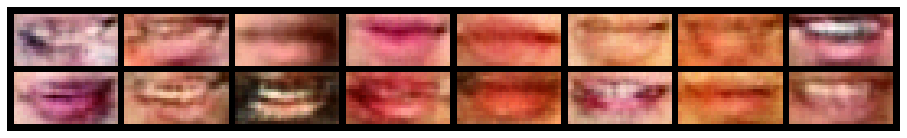

Epoch: [1/20], Batch Num: [550/1122]
Discriminator Loss: 0.5080, Generator Loss: 1.7274
D(x): 0.8260, D(G(z)): 0.2528
Epoch: [1/20], Batch Num: [600/1122]
Discriminator Loss: 0.8862, Generator Loss: 2.1935
D(x): 0.4794, D(G(z)): 0.0574
Epoch: [1/20], Batch Num: [650/1122]
Discriminator Loss: 0.5189, Generator Loss: 1.7582
D(x): 0.7117, D(G(z)): 0.1360
Epoch: [1/20], Batch Num: [700/1122]
Discriminator Loss: 0.2959, Generator Loss: 3.3067
D(x): 0.9749, D(G(z)): 0.2255
Epoch: [1/20], Batch Num: [750/1122]
Discriminator Loss: 0.6102, Generator Loss: 2.6774
D(x): 0.8851, D(G(z)): 0.3589
Epoch: [1/20], Batch Num: [800/1122]
Discriminator Loss: 0.3431, Generator Loss: 2.0643
D(x): 0.8667, D(G(z)): 0.1652
Epoch: [1/20], Batch Num: [850/1122]
Discriminator Loss: 0.5877, Generator Loss: 1.3880
D(x): 0.6664, D(G(z)): 0.1286
Epoch: [1/20], Batch Num: [900/1122]
Discriminator Loss: 0.4283, Generator Loss: 2.2218
D(x): 0.8257, D(G(z)): 0.1957
Epoch: [1/20], Batch Num: [950/1122]
Discriminator Loss:

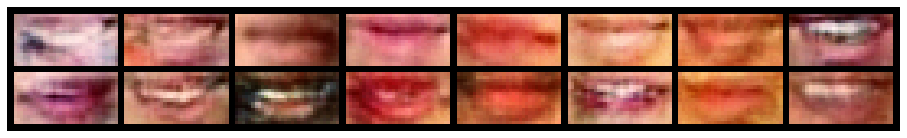

Epoch: [1/20], Batch Num: [1050/1122]
Discriminator Loss: 0.5478, Generator Loss: 1.5886
D(x): 0.7527, D(G(z)): 0.1944
Epoch: [1/20], Batch Num: [1100/1122]
Discriminator Loss: 0.7172, Generator Loss: 3.6217
D(x): 0.8401, D(G(z)): 0.3921
Time taken by 1 epoch(s) is 141.19450783729553.
2
Epoch: [2/20], Batch Num: [0/1122]
Discriminator Loss: 0.5644, Generator Loss: 1.7010
D(x): 0.7629, D(G(z)): 0.2286
torch.Size([16, 100])


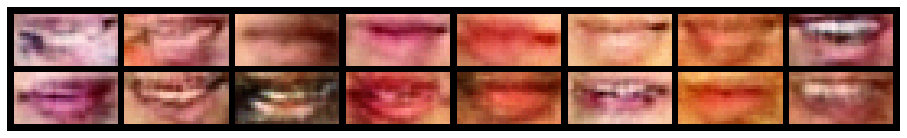

Epoch: [2/20], Batch Num: [50/1122]
Discriminator Loss: 0.6904, Generator Loss: 1.6470
D(x): 0.6424, D(G(z)): 0.1873
Epoch: [2/20], Batch Num: [100/1122]
Discriminator Loss: 0.3081, Generator Loss: 2.9437
D(x): 0.9426, D(G(z)): 0.2097
Epoch: [2/20], Batch Num: [150/1122]
Discriminator Loss: 0.5300, Generator Loss: 1.8363
D(x): 0.6994, D(G(z)): 0.1303
Epoch: [2/20], Batch Num: [200/1122]
Discriminator Loss: 0.5803, Generator Loss: 2.4743
D(x): 0.9354, D(G(z)): 0.3726
Epoch: [2/20], Batch Num: [250/1122]
Discriminator Loss: 0.6460, Generator Loss: 1.2006
D(x): 0.6077, D(G(z)): 0.0842
Epoch: [2/20], Batch Num: [300/1122]
Discriminator Loss: 1.1182, Generator Loss: 3.3819
D(x): 0.9683, D(G(z)): 0.6254
Epoch: [2/20], Batch Num: [350/1122]
Discriminator Loss: 0.5820, Generator Loss: 2.1659
D(x): 0.6512, D(G(z)): 0.1117
Epoch: [2/20], Batch Num: [400/1122]
Discriminator Loss: 0.8122, Generator Loss: 3.8304
D(x): 0.9699, D(G(z)): 0.5099
Epoch: [2/20], Batch Num: [450/1122]
Discriminator Loss: 

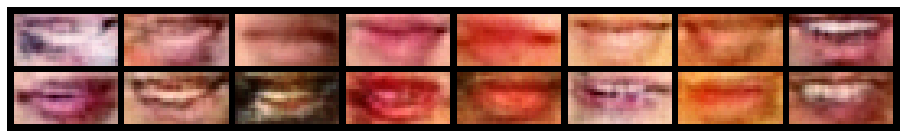

Epoch: [2/20], Batch Num: [550/1122]
Discriminator Loss: 0.3568, Generator Loss: 3.1880
D(x): 0.8082, D(G(z)): 0.1227
Epoch: [2/20], Batch Num: [600/1122]
Discriminator Loss: 0.6031, Generator Loss: 1.7315
D(x): 0.6305, D(G(z)): 0.0929
Epoch: [2/20], Batch Num: [650/1122]
Discriminator Loss: 0.5870, Generator Loss: 2.4354
D(x): 0.7984, D(G(z)): 0.2791
Epoch: [2/20], Batch Num: [700/1122]
Discriminator Loss: 0.4097, Generator Loss: 3.8167
D(x): 0.9890, D(G(z)): 0.3082
Epoch: [2/20], Batch Num: [750/1122]
Discriminator Loss: 0.5138, Generator Loss: 2.9601
D(x): 0.9239, D(G(z)): 0.3353
Epoch: [2/20], Batch Num: [800/1122]
Discriminator Loss: 0.3448, Generator Loss: 2.7491
D(x): 0.9133, D(G(z)): 0.2097
Epoch: [2/20], Batch Num: [850/1122]
Discriminator Loss: 0.4768, Generator Loss: 1.7728
D(x): 0.7518, D(G(z)): 0.1514
Epoch: [2/20], Batch Num: [900/1122]
Discriminator Loss: 0.4809, Generator Loss: 2.3433
D(x): 0.7289, D(G(z)): 0.1214
Epoch: [2/20], Batch Num: [950/1122]
Discriminator Loss:

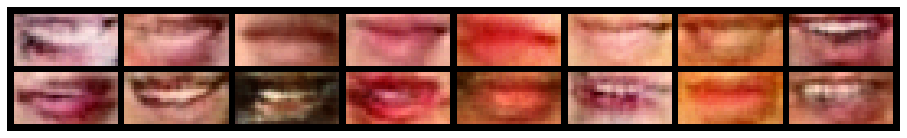

Epoch: [2/20], Batch Num: [1050/1122]
Discriminator Loss: 0.5012, Generator Loss: 1.4039
D(x): 0.6982, D(G(z)): 0.0947
Epoch: [2/20], Batch Num: [1100/1122]
Discriminator Loss: 0.5027, Generator Loss: 2.2196
D(x): 0.7729, D(G(z)): 0.1941
Time taken by 2 epoch(s) is 140.81708979606628.
3
Epoch: [3/20], Batch Num: [0/1122]
Discriminator Loss: 0.5880, Generator Loss: 1.2335
D(x): 0.6430, D(G(z)): 0.0888
torch.Size([16, 100])


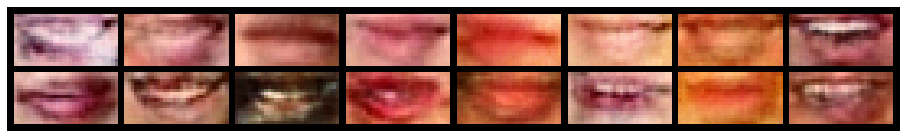

Epoch: [3/20], Batch Num: [50/1122]
Discriminator Loss: 0.5493, Generator Loss: 1.9224
D(x): 0.7639, D(G(z)): 0.2109
Epoch: [3/20], Batch Num: [100/1122]
Discriminator Loss: 0.5956, Generator Loss: 4.1949
D(x): 0.9723, D(G(z)): 0.4114
Epoch: [3/20], Batch Num: [150/1122]
Discriminator Loss: 0.4198, Generator Loss: 1.8142
D(x): 0.7422, D(G(z)): 0.0913
Epoch: [3/20], Batch Num: [200/1122]
Discriminator Loss: 1.0731, Generator Loss: 5.9336
D(x): 0.9903, D(G(z)): 0.6059
Epoch: [3/20], Batch Num: [250/1122]
Discriminator Loss: 0.4749, Generator Loss: 1.7986
D(x): 0.7490, D(G(z)): 0.1423
Epoch: [3/20], Batch Num: [300/1122]
Discriminator Loss: 1.0324, Generator Loss: 4.6011
D(x): 0.9721, D(G(z)): 0.5920
Epoch: [3/20], Batch Num: [350/1122]
Discriminator Loss: 0.3579, Generator Loss: 2.6081
D(x): 0.8216, D(G(z)): 0.1304
Epoch: [3/20], Batch Num: [400/1122]
Discriminator Loss: 0.3591, Generator Loss: 1.4488
D(x): 0.7723, D(G(z)): 0.0782
Epoch: [3/20], Batch Num: [450/1122]
Discriminator Loss: 

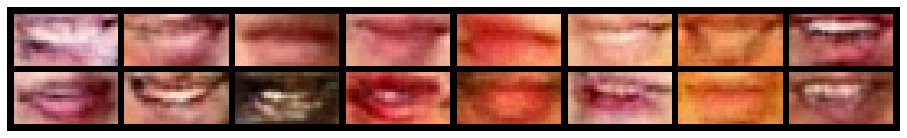

Epoch: [3/20], Batch Num: [550/1122]
Discriminator Loss: 0.3437, Generator Loss: 2.7341
D(x): 0.9084, D(G(z)): 0.2078
Epoch: [3/20], Batch Num: [600/1122]
Discriminator Loss: 0.7159, Generator Loss: 1.6010
D(x): 0.5459, D(G(z)): 0.0442
Epoch: [3/20], Batch Num: [650/1122]
Discriminator Loss: 0.5250, Generator Loss: 1.5767
D(x): 0.7278, D(G(z)): 0.1530
Epoch: [3/20], Batch Num: [700/1122]
Discriminator Loss: 0.0966, Generator Loss: 4.1464
D(x): 0.9924, D(G(z)): 0.0827
Epoch: [3/20], Batch Num: [750/1122]
Discriminator Loss: 0.5284, Generator Loss: 3.2273
D(x): 0.8500, D(G(z)): 0.2840
Epoch: [3/20], Batch Num: [800/1122]
Discriminator Loss: 0.2614, Generator Loss: 2.9746
D(x): 0.9167, D(G(z)): 0.1521
Epoch: [3/20], Batch Num: [850/1122]
Discriminator Loss: 0.4232, Generator Loss: 1.9293
D(x): 0.7768, D(G(z)): 0.1344
Epoch: [3/20], Batch Num: [900/1122]
Discriminator Loss: 0.7473, Generator Loss: 2.7382
D(x): 0.8373, D(G(z)): 0.3902
Epoch: [3/20], Batch Num: [950/1122]
Discriminator Loss:

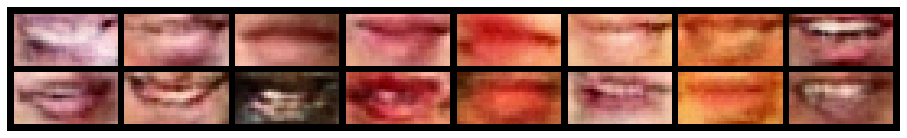

Epoch: [3/20], Batch Num: [1050/1122]
Discriminator Loss: 0.3499, Generator Loss: 1.9333
D(x): 0.8097, D(G(z)): 0.1137
Epoch: [3/20], Batch Num: [1100/1122]
Discriminator Loss: 0.3986, Generator Loss: 0.8075
D(x): 0.7704, D(G(z)): 0.1062
Time taken by 3 epoch(s) is 141.5098762512207.
4
Epoch: [4/20], Batch Num: [0/1122]
Discriminator Loss: 0.3784, Generator Loss: 1.8342
D(x): 0.7961, D(G(z)): 0.1126
torch.Size([16, 100])


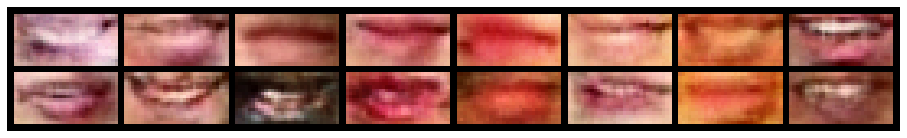

Epoch: [4/20], Batch Num: [50/1122]
Discriminator Loss: 0.5379, Generator Loss: 1.5721
D(x): 0.6741, D(G(z)): 0.0961
Epoch: [4/20], Batch Num: [100/1122]
Discriminator Loss: 0.2774, Generator Loss: 1.9259
D(x): 0.9352, D(G(z)): 0.1793
Epoch: [4/20], Batch Num: [150/1122]
Discriminator Loss: 0.3495, Generator Loss: 2.5073
D(x): 0.8277, D(G(z)): 0.1287
Epoch: [4/20], Batch Num: [200/1122]
Discriminator Loss: 0.3172, Generator Loss: 2.5167
D(x): 0.8109, D(G(z)): 0.0861
Epoch: [4/20], Batch Num: [250/1122]
Discriminator Loss: 1.6612, Generator Loss: 3.1657
D(x): 0.9422, D(G(z)): 0.7564
Epoch: [4/20], Batch Num: [300/1122]
Discriminator Loss: 0.7951, Generator Loss: 2.9627
D(x): 0.9535, D(G(z)): 0.4753
Epoch: [4/20], Batch Num: [350/1122]
Discriminator Loss: 0.3535, Generator Loss: 3.4527
D(x): 0.9102, D(G(z)): 0.2145
Epoch: [4/20], Batch Num: [400/1122]
Discriminator Loss: 0.2920, Generator Loss: 2.5704
D(x): 0.8833, D(G(z)): 0.1455
Epoch: [4/20], Batch Num: [450/1122]
Discriminator Loss: 

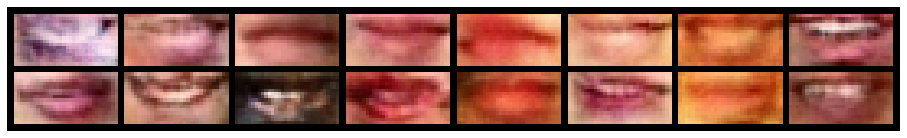

Epoch: [4/20], Batch Num: [550/1122]
Discriminator Loss: 0.3048, Generator Loss: 2.9281
D(x): 0.9337, D(G(z)): 0.1994
Epoch: [4/20], Batch Num: [600/1122]
Discriminator Loss: 0.2996, Generator Loss: 1.8703
D(x): 0.8016, D(G(z)): 0.0590
Epoch: [4/20], Batch Num: [650/1122]
Discriminator Loss: 0.4091, Generator Loss: 2.7973
D(x): 0.9245, D(G(z)): 0.2623
Epoch: [4/20], Batch Num: [700/1122]
Discriminator Loss: 0.2487, Generator Loss: 3.6046
D(x): 0.9941, D(G(z)): 0.2003
Epoch: [4/20], Batch Num: [750/1122]
Discriminator Loss: 0.5444, Generator Loss: 3.5689
D(x): 0.9608, D(G(z)): 0.3706
Epoch: [4/20], Batch Num: [800/1122]
Discriminator Loss: 0.1793, Generator Loss: 2.7662
D(x): 0.8808, D(G(z)): 0.0435
Epoch: [4/20], Batch Num: [850/1122]
Discriminator Loss: 0.5297, Generator Loss: 1.9195
D(x): 0.7616, D(G(z)): 0.2003
Epoch: [4/20], Batch Num: [900/1122]
Discriminator Loss: 0.2740, Generator Loss: 2.0397
D(x): 0.9043, D(G(z)): 0.1443
Epoch: [4/20], Batch Num: [950/1122]
Discriminator Loss:

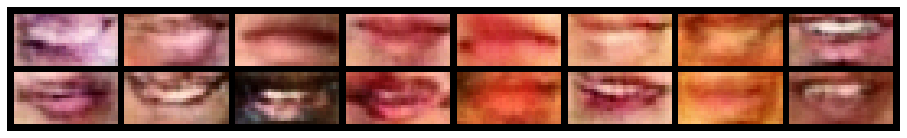

Epoch: [4/20], Batch Num: [1050/1122]
Discriminator Loss: 0.3318, Generator Loss: 2.7133
D(x): 0.8328, D(G(z)): 0.1154
Epoch: [4/20], Batch Num: [1100/1122]
Discriminator Loss: 0.3913, Generator Loss: 2.2155
D(x): 0.7682, D(G(z)): 0.0896
Time taken by 4 epoch(s) is 140.44663000106812.
5
Epoch: [5/20], Batch Num: [0/1122]
Discriminator Loss: 0.2969, Generator Loss: 2.6079
D(x): 0.8105, D(G(z)): 0.0688
torch.Size([16, 100])


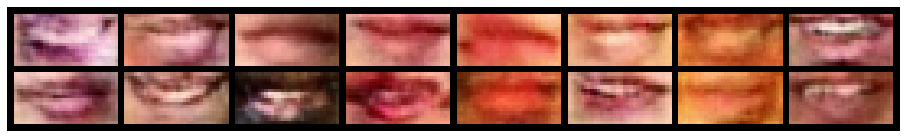

Epoch: [5/20], Batch Num: [50/1122]
Discriminator Loss: 0.6526, Generator Loss: 2.3021
D(x): 0.5970, D(G(z)): 0.0481
Epoch: [5/20], Batch Num: [100/1122]
Discriminator Loss: 0.2011, Generator Loss: 3.4369
D(x): 0.9766, D(G(z)): 0.1546
Epoch: [5/20], Batch Num: [150/1122]
Discriminator Loss: 0.5939, Generator Loss: 2.1368
D(x): 0.6100, D(G(z)): 0.0212
Epoch: [5/20], Batch Num: [200/1122]
Discriminator Loss: 0.4300, Generator Loss: 4.2249
D(x): 0.9338, D(G(z)): 0.2845
Epoch: [5/20], Batch Num: [250/1122]
Discriminator Loss: 0.3406, Generator Loss: 1.8024
D(x): 0.8413, D(G(z)): 0.1369
Epoch: [5/20], Batch Num: [300/1122]
Discriminator Loss: 0.8790, Generator Loss: 3.6940
D(x): 0.9633, D(G(z)): 0.5266
Epoch: [5/20], Batch Num: [350/1122]
Discriminator Loss: 0.3126, Generator Loss: 3.7365
D(x): 0.9513, D(G(z)): 0.2132
Epoch: [5/20], Batch Num: [400/1122]
Discriminator Loss: 0.2910, Generator Loss: 3.1433
D(x): 0.9322, D(G(z)): 0.1850
Epoch: [5/20], Batch Num: [450/1122]
Discriminator Loss: 

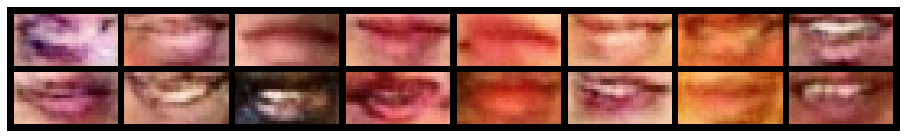

Epoch: [5/20], Batch Num: [550/1122]
Discriminator Loss: 0.2066, Generator Loss: 3.2951
D(x): 0.9533, D(G(z)): 0.1399
Epoch: [5/20], Batch Num: [600/1122]
Discriminator Loss: 1.2691, Generator Loss: 1.9529
D(x): 0.3653, D(G(z)): 0.0119
Epoch: [5/20], Batch Num: [650/1122]
Discriminator Loss: 0.4183, Generator Loss: 3.6976
D(x): 0.8559, D(G(z)): 0.2032
Epoch: [5/20], Batch Num: [700/1122]
Discriminator Loss: 0.2932, Generator Loss: 5.0191
D(x): 0.9982, D(G(z)): 0.2304
Epoch: [5/20], Batch Num: [750/1122]
Discriminator Loss: 0.2691, Generator Loss: 2.2832
D(x): 0.9033, D(G(z)): 0.1418
Epoch: [5/20], Batch Num: [800/1122]
Discriminator Loss: 0.2986, Generator Loss: 3.5539
D(x): 0.9403, D(G(z)): 0.1952
Epoch: [5/20], Batch Num: [850/1122]
Discriminator Loss: 0.4235, Generator Loss: 2.0718
D(x): 0.7722, D(G(z)): 0.1192
Epoch: [5/20], Batch Num: [900/1122]
Discriminator Loss: 0.3956, Generator Loss: 2.3611
D(x): 0.7258, D(G(z)): 0.0277
Epoch: [5/20], Batch Num: [950/1122]
Discriminator Loss:

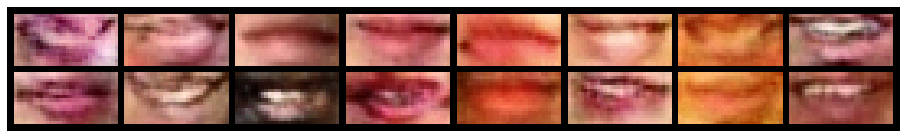

Epoch: [5/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2374, Generator Loss: 1.9131
D(x): 0.8713, D(G(z)): 0.0796
Epoch: [5/20], Batch Num: [1100/1122]
Discriminator Loss: 0.6691, Generator Loss: 2.1312
D(x): 0.5745, D(G(z)): 0.0136
Time taken by 5 epoch(s) is 140.88852071762085.
6
Epoch: [6/20], Batch Num: [0/1122]
Discriminator Loss: 0.2559, Generator Loss: 2.5135
D(x): 0.8450, D(G(z)): 0.0720
torch.Size([16, 100])


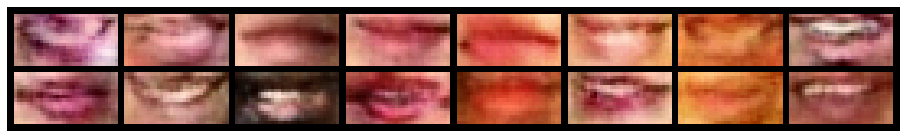

Epoch: [6/20], Batch Num: [50/1122]
Discriminator Loss: 0.2629, Generator Loss: 2.0398
D(x): 0.8790, D(G(z)): 0.1072
Epoch: [6/20], Batch Num: [100/1122]
Discriminator Loss: 0.2583, Generator Loss: 4.1039
D(x): 0.9793, D(G(z)): 0.1988
Epoch: [6/20], Batch Num: [150/1122]
Discriminator Loss: 0.3608, Generator Loss: 2.9210
D(x): 0.7960, D(G(z)): 0.1028
Epoch: [6/20], Batch Num: [200/1122]
Discriminator Loss: 2.7540, Generator Loss: 6.8124
D(x): 0.9995, D(G(z)): 0.8990
Epoch: [6/20], Batch Num: [250/1122]
Discriminator Loss: 0.3445, Generator Loss: 2.4370
D(x): 0.8183, D(G(z)): 0.1156
Epoch: [6/20], Batch Num: [300/1122]
Discriminator Loss: 0.4490, Generator Loss: 2.9505
D(x): 0.9204, D(G(z)): 0.2810
Epoch: [6/20], Batch Num: [350/1122]
Discriminator Loss: 0.1964, Generator Loss: 3.3576
D(x): 0.8637, D(G(z)): 0.0391
Epoch: [6/20], Batch Num: [400/1122]
Discriminator Loss: 0.3173, Generator Loss: 2.9693
D(x): 0.9377, D(G(z)): 0.1977
Epoch: [6/20], Batch Num: [450/1122]
Discriminator Loss: 

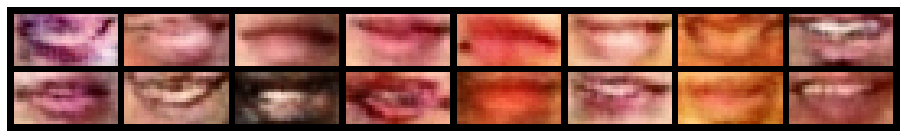

Epoch: [6/20], Batch Num: [550/1122]
Discriminator Loss: 0.1879, Generator Loss: 3.2226
D(x): 0.9214, D(G(z)): 0.0933
Epoch: [6/20], Batch Num: [600/1122]
Discriminator Loss: 0.2698, Generator Loss: 3.0308
D(x): 0.9166, D(G(z)): 0.1545
Epoch: [6/20], Batch Num: [650/1122]
Discriminator Loss: 0.2957, Generator Loss: 2.4634
D(x): 0.8549, D(G(z)): 0.1171
Epoch: [6/20], Batch Num: [700/1122]
Discriminator Loss: 0.1191, Generator Loss: 4.3969
D(x): 0.9984, D(G(z)): 0.1055
Epoch: [6/20], Batch Num: [750/1122]
Discriminator Loss: 0.3866, Generator Loss: 3.2039
D(x): 0.8475, D(G(z)): 0.1691
Epoch: [6/20], Batch Num: [800/1122]
Discriminator Loss: 0.2065, Generator Loss: 2.3675
D(x): 0.9279, D(G(z)): 0.1132
Epoch: [6/20], Batch Num: [850/1122]
Discriminator Loss: 0.3574, Generator Loss: 2.1875
D(x): 0.9126, D(G(z)): 0.2183
Epoch: [6/20], Batch Num: [900/1122]
Discriminator Loss: 0.2202, Generator Loss: 2.7045
D(x): 0.8536, D(G(z)): 0.0482
Epoch: [6/20], Batch Num: [950/1122]
Discriminator Loss:

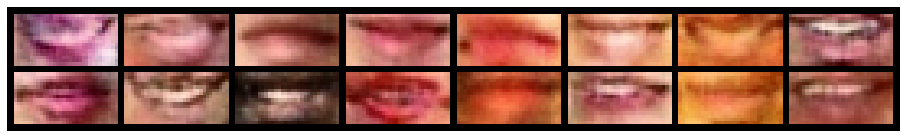

Epoch: [6/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2897, Generator Loss: 2.0347
D(x): 0.7960, D(G(z)): 0.0398
Epoch: [6/20], Batch Num: [1100/1122]
Discriminator Loss: 0.4272, Generator Loss: 0.9897
D(x): 0.7076, D(G(z)): 0.0356
Time taken by 6 epoch(s) is 140.22922205924988.
7
Epoch: [7/20], Batch Num: [0/1122]
Discriminator Loss: 0.4009, Generator Loss: 3.0988
D(x): 0.7871, D(G(z)): 0.0968
torch.Size([16, 100])


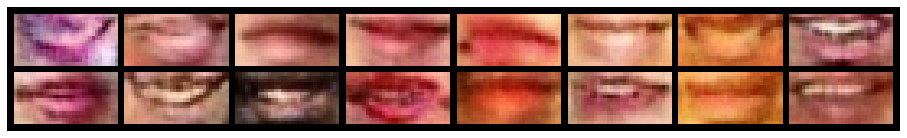

Epoch: [7/20], Batch Num: [50/1122]
Discriminator Loss: 0.2729, Generator Loss: 2.8014
D(x): 0.9445, D(G(z)): 0.1819
Epoch: [7/20], Batch Num: [100/1122]
Discriminator Loss: 0.2332, Generator Loss: 3.0747
D(x): 0.9666, D(G(z)): 0.1677
Epoch: [7/20], Batch Num: [150/1122]
Discriminator Loss: 0.2473, Generator Loss: 2.4613
D(x): 0.8141, D(G(z)): 0.0286
Epoch: [7/20], Batch Num: [200/1122]
Discriminator Loss: 0.2465, Generator Loss: 2.2600
D(x): 0.8770, D(G(z)): 0.0932
Epoch: [7/20], Batch Num: [250/1122]
Discriminator Loss: 0.2736, Generator Loss: 2.7722
D(x): 0.9114, D(G(z)): 0.1500
Epoch: [7/20], Batch Num: [300/1122]
Discriminator Loss: 0.3013, Generator Loss: 2.4765
D(x): 0.9270, D(G(z)): 0.1855
Epoch: [7/20], Batch Num: [350/1122]
Discriminator Loss: 0.1969, Generator Loss: 3.5334
D(x): 0.8741, D(G(z)): 0.0521
Epoch: [7/20], Batch Num: [400/1122]
Discriminator Loss: 0.2143, Generator Loss: 3.5294
D(x): 0.9482, D(G(z)): 0.1350
Epoch: [7/20], Batch Num: [450/1122]
Discriminator Loss: 

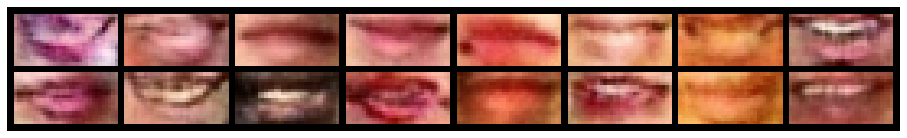

Epoch: [7/20], Batch Num: [550/1122]
Discriminator Loss: 0.3286, Generator Loss: 2.8044
D(x): 0.8469, D(G(z)): 0.1336
Epoch: [7/20], Batch Num: [600/1122]
Discriminator Loss: 0.2056, Generator Loss: 3.3480
D(x): 0.9180, D(G(z)): 0.1052
Epoch: [7/20], Batch Num: [650/1122]
Discriminator Loss: 0.4061, Generator Loss: 1.9606
D(x): 0.7510, D(G(z)): 0.0868
Epoch: [7/20], Batch Num: [700/1122]
Discriminator Loss: 0.1724, Generator Loss: 3.5124
D(x): 0.9941, D(G(z)): 0.1459
Epoch: [7/20], Batch Num: [750/1122]
Discriminator Loss: 0.3276, Generator Loss: 3.0039
D(x): 0.8828, D(G(z)): 0.1631
Epoch: [7/20], Batch Num: [800/1122]
Discriminator Loss: 0.3357, Generator Loss: 3.5259
D(x): 0.9747, D(G(z)): 0.2465
Epoch: [7/20], Batch Num: [850/1122]
Discriminator Loss: 0.4005, Generator Loss: 1.9674
D(x): 0.7934, D(G(z)): 0.1189
Epoch: [7/20], Batch Num: [900/1122]
Discriminator Loss: 0.2038, Generator Loss: 1.9335
D(x): 0.8803, D(G(z)): 0.0620
Epoch: [7/20], Batch Num: [950/1122]
Discriminator Loss:

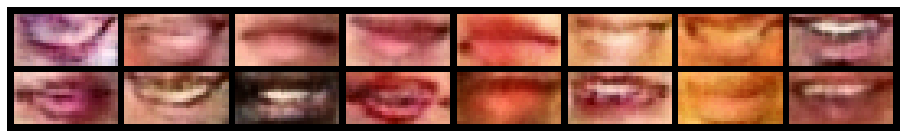

Epoch: [7/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2541, Generator Loss: 2.1626
D(x): 0.9046, D(G(z)): 0.1306
Epoch: [7/20], Batch Num: [1100/1122]
Discriminator Loss: 0.3137, Generator Loss: 1.9930
D(x): 0.7690, D(G(z)): 0.0225
Time taken by 7 epoch(s) is 140.36475324630737.
8
Epoch: [8/20], Batch Num: [0/1122]
Discriminator Loss: 0.2750, Generator Loss: 2.4782
D(x): 0.7869, D(G(z)): 0.0149
torch.Size([16, 100])


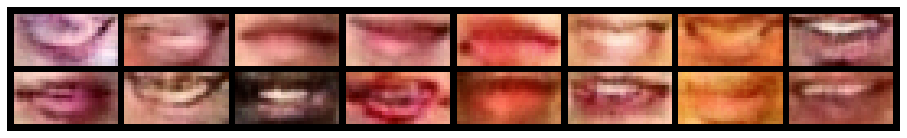

Epoch: [8/20], Batch Num: [50/1122]
Discriminator Loss: 0.2823, Generator Loss: 3.2732
D(x): 0.9494, D(G(z)): 0.1886
Epoch: [8/20], Batch Num: [100/1122]
Discriminator Loss: 0.3248, Generator Loss: 3.4045
D(x): 0.8908, D(G(z)): 0.1717
Epoch: [8/20], Batch Num: [150/1122]
Discriminator Loss: 0.2507, Generator Loss: 2.1614
D(x): 0.8324, D(G(z)): 0.0420
Epoch: [8/20], Batch Num: [200/1122]
Discriminator Loss: 0.2078, Generator Loss: 3.2340
D(x): 0.8867, D(G(z)): 0.0730
Epoch: [8/20], Batch Num: [250/1122]
Discriminator Loss: 0.2406, Generator Loss: 2.6420
D(x): 0.8968, D(G(z)): 0.1102
Epoch: [8/20], Batch Num: [300/1122]
Discriminator Loss: 0.5963, Generator Loss: 3.4982
D(x): 0.9794, D(G(z)): 0.4035
Epoch: [8/20], Batch Num: [350/1122]
Discriminator Loss: 0.9935, Generator Loss: 8.5172
D(x): 0.9989, D(G(z)): 0.5602
Epoch: [8/20], Batch Num: [400/1122]
Discriminator Loss: 0.2540, Generator Loss: 3.1650
D(x): 0.9306, D(G(z)): 0.1467
Epoch: [8/20], Batch Num: [450/1122]
Discriminator Loss: 

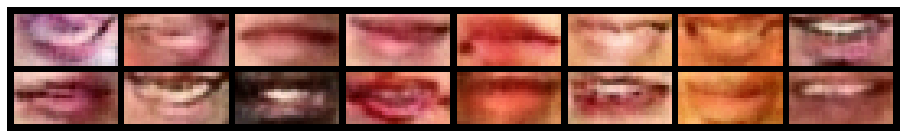

Epoch: [8/20], Batch Num: [550/1122]
Discriminator Loss: 0.1378, Generator Loss: 3.8277
D(x): 0.9836, D(G(z)): 0.1099
Epoch: [8/20], Batch Num: [600/1122]
Discriminator Loss: 0.2169, Generator Loss: 1.6734
D(x): 0.8319, D(G(z)): 0.0163
Epoch: [8/20], Batch Num: [650/1122]
Discriminator Loss: 0.2381, Generator Loss: 2.2000
D(x): 0.8407, D(G(z)): 0.0458
Epoch: [8/20], Batch Num: [700/1122]
Discriminator Loss: 0.2547, Generator Loss: 4.6672
D(x): 0.9965, D(G(z)): 0.2051
Epoch: [8/20], Batch Num: [750/1122]
Discriminator Loss: 0.2413, Generator Loss: 3.1706
D(x): 0.8330, D(G(z)): 0.0380
Epoch: [8/20], Batch Num: [800/1122]
Discriminator Loss: 0.2468, Generator Loss: 3.9426
D(x): 0.8142, D(G(z)): 0.0282
Epoch: [8/20], Batch Num: [850/1122]
Discriminator Loss: 0.6907, Generator Loss: 3.2274
D(x): 0.8240, D(G(z)): 0.3335
Epoch: [8/20], Batch Num: [900/1122]
Discriminator Loss: 0.3706, Generator Loss: 2.9993
D(x): 0.7736, D(G(z)): 0.0791
Epoch: [8/20], Batch Num: [950/1122]
Discriminator Loss:

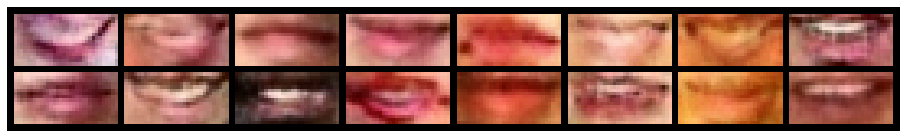

Epoch: [8/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2604, Generator Loss: 2.0470
D(x): 0.8523, D(G(z)): 0.0810
Epoch: [8/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1800, Generator Loss: 2.2146
D(x): 0.9034, D(G(z)): 0.0680
Time taken by 8 epoch(s) is 140.99049139022827.
9
Epoch: [9/20], Batch Num: [0/1122]
Discriminator Loss: 0.1672, Generator Loss: 3.1111
D(x): 0.9525, D(G(z)): 0.1054
torch.Size([16, 100])


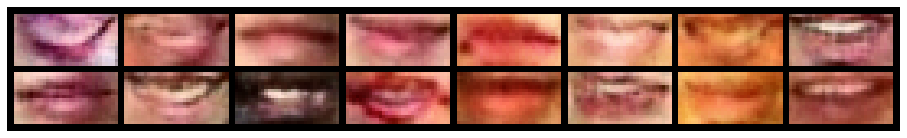

Epoch: [9/20], Batch Num: [50/1122]
Discriminator Loss: 0.3623, Generator Loss: 4.5852
D(x): 0.9587, D(G(z)): 0.2535
Epoch: [9/20], Batch Num: [100/1122]
Discriminator Loss: 0.1126, Generator Loss: 3.4001
D(x): 0.9763, D(G(z)): 0.0802
Epoch: [9/20], Batch Num: [150/1122]
Discriminator Loss: 0.2003, Generator Loss: 5.0262
D(x): 0.8662, D(G(z)): 0.0441
Epoch: [9/20], Batch Num: [200/1122]
Discriminator Loss: 0.2310, Generator Loss: 4.1413
D(x): 0.9259, D(G(z)): 0.1299
Epoch: [9/20], Batch Num: [250/1122]
Discriminator Loss: 0.2028, Generator Loss: 2.7897
D(x): 0.9061, D(G(z)): 0.0896
Epoch: [9/20], Batch Num: [300/1122]
Discriminator Loss: 0.2111, Generator Loss: 1.7304
D(x): 0.8683, D(G(z)): 0.0567
Epoch: [9/20], Batch Num: [350/1122]
Discriminator Loss: 0.1792, Generator Loss: 4.2749
D(x): 0.8715, D(G(z)): 0.0310
Epoch: [9/20], Batch Num: [400/1122]
Discriminator Loss: 0.2897, Generator Loss: 4.1259
D(x): 0.9473, D(G(z)): 0.1800
Epoch: [9/20], Batch Num: [450/1122]
Discriminator Loss: 

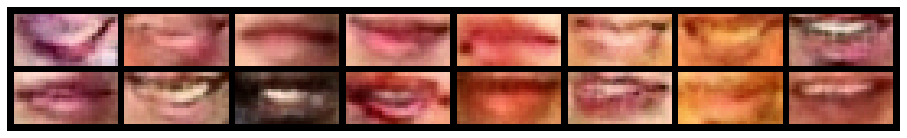

Epoch: [9/20], Batch Num: [550/1122]
Discriminator Loss: 0.3097, Generator Loss: 3.0296
D(x): 0.8888, D(G(z)): 0.1593
Epoch: [9/20], Batch Num: [600/1122]
Discriminator Loss: 0.2399, Generator Loss: 3.8862
D(x): 0.9076, D(G(z)): 0.1218
Epoch: [9/20], Batch Num: [650/1122]
Discriminator Loss: 0.2846, Generator Loss: 2.7553
D(x): 0.8871, D(G(z)): 0.1363
Epoch: [9/20], Batch Num: [700/1122]
Discriminator Loss: 0.2729, Generator Loss: 5.6413
D(x): 0.9992, D(G(z)): 0.2043
Epoch: [9/20], Batch Num: [750/1122]
Discriminator Loss: 0.1771, Generator Loss: 2.5789
D(x): 0.9331, D(G(z)): 0.0956
Epoch: [9/20], Batch Num: [800/1122]
Discriminator Loss: 0.2386, Generator Loss: 3.6337
D(x): 0.9667, D(G(z)): 0.1671
Epoch: [9/20], Batch Num: [850/1122]
Discriminator Loss: 0.2890, Generator Loss: 2.4021
D(x): 0.8554, D(G(z)): 0.1071
Epoch: [9/20], Batch Num: [900/1122]
Discriminator Loss: 0.3803, Generator Loss: 2.2273
D(x): 0.7677, D(G(z)): 0.0754
Epoch: [9/20], Batch Num: [950/1122]
Discriminator Loss:

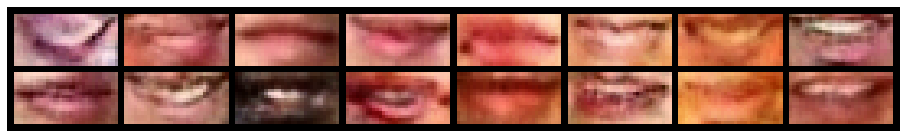

Epoch: [9/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2274, Generator Loss: 2.2822
D(x): 0.9148, D(G(z)): 0.1181
Epoch: [9/20], Batch Num: [1100/1122]
Discriminator Loss: 0.2047, Generator Loss: 2.9628
D(x): 0.8551, D(G(z)): 0.0365
Time taken by 9 epoch(s) is 140.6883101463318.
10
Epoch: [10/20], Batch Num: [0/1122]
Discriminator Loss: 0.1785, Generator Loss: 3.0069
D(x): 0.8969, D(G(z)): 0.0600
torch.Size([16, 100])


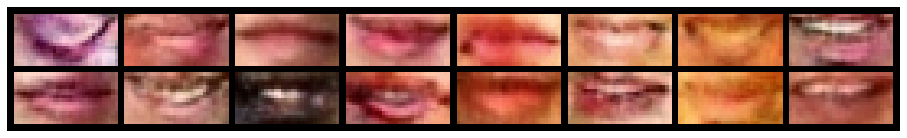

Epoch: [10/20], Batch Num: [50/1122]
Discriminator Loss: 0.1782, Generator Loss: 2.6646
D(x): 0.8882, D(G(z)): 0.0481
Epoch: [10/20], Batch Num: [100/1122]
Discriminator Loss: 0.1577, Generator Loss: 3.6448
D(x): 0.9465, D(G(z)): 0.0921
Epoch: [10/20], Batch Num: [150/1122]
Discriminator Loss: 0.2100, Generator Loss: 3.1141
D(x): 0.8601, D(G(z)): 0.0412
Epoch: [10/20], Batch Num: [200/1122]
Discriminator Loss: 0.1689, Generator Loss: 2.9280
D(x): 0.8946, D(G(z)): 0.0461
Epoch: [10/20], Batch Num: [250/1122]
Discriminator Loss: 0.2620, Generator Loss: 3.5511
D(x): 0.9505, D(G(z)): 0.1778
Epoch: [10/20], Batch Num: [300/1122]
Discriminator Loss: 0.2472, Generator Loss: 1.6882
D(x): 0.8553, D(G(z)): 0.0725
Epoch: [10/20], Batch Num: [350/1122]
Discriminator Loss: 0.4890, Generator Loss: 4.2201
D(x): 0.6547, D(G(z)): 0.0048
Epoch: [10/20], Batch Num: [400/1122]
Discriminator Loss: 1.0303, Generator Loss: 4.6451
D(x): 0.9923, D(G(z)): 0.5705
Epoch: [10/20], Batch Num: [450/1122]
Discriminat

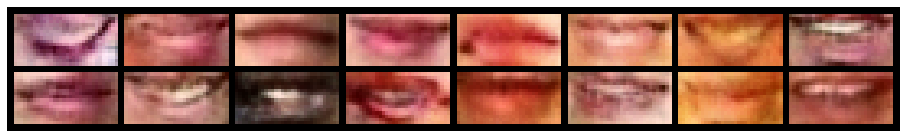

Epoch: [10/20], Batch Num: [550/1122]
Discriminator Loss: 0.1115, Generator Loss: 2.8756
D(x): 0.9437, D(G(z)): 0.0486
Epoch: [10/20], Batch Num: [600/1122]
Discriminator Loss: 0.1179, Generator Loss: 3.0105
D(x): 0.9676, D(G(z)): 0.0746
Epoch: [10/20], Batch Num: [650/1122]
Discriminator Loss: 0.2279, Generator Loss: 2.1643
D(x): 0.8998, D(G(z)): 0.1025
Epoch: [10/20], Batch Num: [700/1122]
Discriminator Loss: 0.0979, Generator Loss: 4.2296
D(x): 0.9950, D(G(z)): 0.0846
Epoch: [10/20], Batch Num: [750/1122]
Discriminator Loss: 0.1920, Generator Loss: 3.5019
D(x): 0.9430, D(G(z)): 0.1150
Epoch: [10/20], Batch Num: [800/1122]
Discriminator Loss: 0.3442, Generator Loss: 4.1518
D(x): 0.9891, D(G(z)): 0.2589
Epoch: [10/20], Batch Num: [850/1122]
Discriminator Loss: 0.7334, Generator Loss: 6.7694
D(x): 0.9796, D(G(z)): 0.4511
Epoch: [10/20], Batch Num: [900/1122]
Discriminator Loss: 0.2483, Generator Loss: 2.4803
D(x): 0.8228, D(G(z)): 0.0376
Epoch: [10/20], Batch Num: [950/1122]
Discrimina

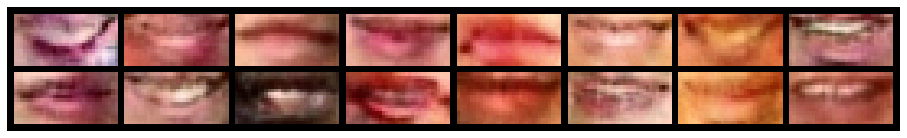

Epoch: [10/20], Batch Num: [1050/1122]
Discriminator Loss: 0.3211, Generator Loss: 1.4810
D(x): 0.7671, D(G(z)): 0.0286
Epoch: [10/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1891, Generator Loss: 2.6066
D(x): 0.8816, D(G(z)): 0.0483
Time taken by 10 epoch(s) is 140.73725962638855.
11
Epoch: [11/20], Batch Num: [0/1122]
Discriminator Loss: 0.2478, Generator Loss: 2.7587
D(x): 0.8407, D(G(z)): 0.0545
torch.Size([16, 100])


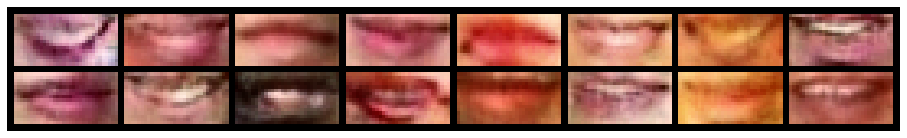

Epoch: [11/20], Batch Num: [50/1122]
Discriminator Loss: 0.1436, Generator Loss: 2.6641
D(x): 0.9581, D(G(z)): 0.0901
Epoch: [11/20], Batch Num: [100/1122]
Discriminator Loss: 0.1949, Generator Loss: 2.6165
D(x): 0.9133, D(G(z)): 0.0810
Epoch: [11/20], Batch Num: [150/1122]
Discriminator Loss: 0.5778, Generator Loss: 2.7255
D(x): 0.6203, D(G(z)): 0.0165
Epoch: [11/20], Batch Num: [200/1122]
Discriminator Loss: 0.1885, Generator Loss: 2.6374
D(x): 0.9048, D(G(z)): 0.0752
Epoch: [11/20], Batch Num: [250/1122]
Discriminator Loss: 0.2166, Generator Loss: 3.8815
D(x): 0.9399, D(G(z)): 0.1205
Epoch: [11/20], Batch Num: [300/1122]
Discriminator Loss: 0.2373, Generator Loss: 1.9732
D(x): 0.8863, D(G(z)): 0.0995
Epoch: [11/20], Batch Num: [350/1122]
Discriminator Loss: 0.2172, Generator Loss: 4.6687
D(x): 0.9803, D(G(z)): 0.1663
Epoch: [11/20], Batch Num: [400/1122]
Discriminator Loss: 0.1402, Generator Loss: 3.6224
D(x): 0.9388, D(G(z)): 0.0687
Epoch: [11/20], Batch Num: [450/1122]
Discriminat

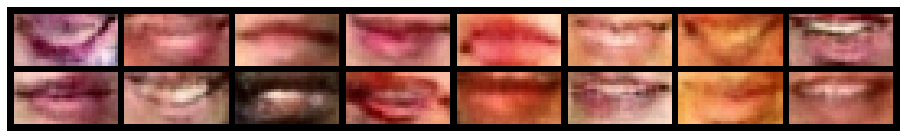

Epoch: [11/20], Batch Num: [550/1122]
Discriminator Loss: 0.4717, Generator Loss: 5.0081
D(x): 0.9959, D(G(z)): 0.3286
Epoch: [11/20], Batch Num: [600/1122]
Discriminator Loss: 0.2245, Generator Loss: 2.5958
D(x): 0.8603, D(G(z)): 0.0518
Epoch: [11/20], Batch Num: [650/1122]
Discriminator Loss: 0.2822, Generator Loss: 3.7496
D(x): 0.9141, D(G(z)): 0.1473
Epoch: [11/20], Batch Num: [700/1122]
Discriminator Loss: 0.1296, Generator Loss: 4.7676
D(x): 0.9977, D(G(z)): 0.1114
Epoch: [11/20], Batch Num: [750/1122]
Discriminator Loss: 0.2668, Generator Loss: 2.8115
D(x): 0.8316, D(G(z)): 0.0447
Epoch: [11/20], Batch Num: [800/1122]
Discriminator Loss: 0.2609, Generator Loss: 4.0934
D(x): 0.8138, D(G(z)): 0.0354
Epoch: [11/20], Batch Num: [850/1122]
Discriminator Loss: 0.3244, Generator Loss: 3.7122
D(x): 0.9132, D(G(z)): 0.1910
Epoch: [11/20], Batch Num: [900/1122]
Discriminator Loss: 0.2015, Generator Loss: 2.9560
D(x): 0.8661, D(G(z)): 0.0468
Epoch: [11/20], Batch Num: [950/1122]
Discrimina

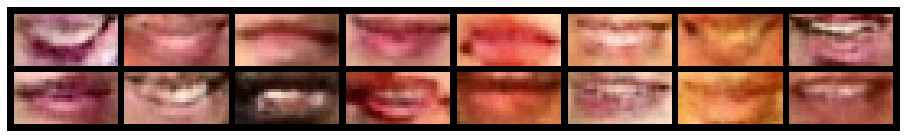

Epoch: [11/20], Batch Num: [1050/1122]
Discriminator Loss: 0.1964, Generator Loss: 2.0469
D(x): 0.9127, D(G(z)): 0.0915
Epoch: [11/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1669, Generator Loss: 3.0405
D(x): 0.9132, D(G(z)): 0.0660
Time taken by 11 epoch(s) is 140.31135511398315.
12
Epoch: [12/20], Batch Num: [0/1122]
Discriminator Loss: 0.1327, Generator Loss: 3.4510
D(x): 0.9491, D(G(z)): 0.0734
torch.Size([16, 100])


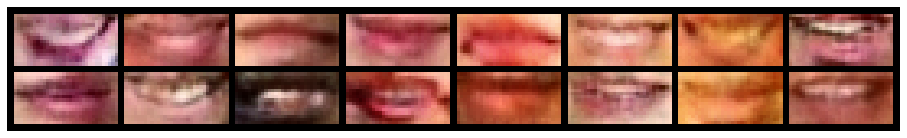

Epoch: [12/20], Batch Num: [50/1122]
Discriminator Loss: 0.1254, Generator Loss: 3.3178
D(x): 0.9531, D(G(z)): 0.0706
Epoch: [12/20], Batch Num: [100/1122]
Discriminator Loss: 0.0971, Generator Loss: 3.6372
D(x): 0.9733, D(G(z)): 0.0657
Epoch: [12/20], Batch Num: [150/1122]
Discriminator Loss: 0.1517, Generator Loss: 3.6919
D(x): 0.9110, D(G(z)): 0.0509
Epoch: [12/20], Batch Num: [200/1122]
Discriminator Loss: 0.1833, Generator Loss: 2.6911
D(x): 0.8729, D(G(z)): 0.0289
Epoch: [12/20], Batch Num: [250/1122]
Discriminator Loss: 0.2724, Generator Loss: 2.8923
D(x): 0.8385, D(G(z)): 0.0647
Epoch: [12/20], Batch Num: [300/1122]
Discriminator Loss: 0.2677, Generator Loss: 1.8501
D(x): 0.8734, D(G(z)): 0.1062
Epoch: [12/20], Batch Num: [350/1122]
Discriminator Loss: 0.1340, Generator Loss: 3.6169
D(x): 0.9678, D(G(z)): 0.0910
Epoch: [12/20], Batch Num: [400/1122]
Discriminator Loss: 0.1693, Generator Loss: 4.0985
D(x): 0.9501, D(G(z)): 0.1039
Epoch: [12/20], Batch Num: [450/1122]
Discriminat

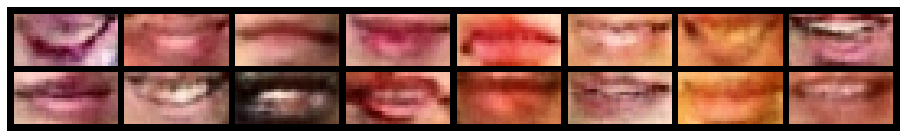

Epoch: [12/20], Batch Num: [550/1122]
Discriminator Loss: 0.1246, Generator Loss: 3.4764
D(x): 0.9666, D(G(z)): 0.0826
Epoch: [12/20], Batch Num: [600/1122]
Discriminator Loss: 0.1355, Generator Loss: 3.8043
D(x): 0.9551, D(G(z)): 0.0792
Epoch: [12/20], Batch Num: [650/1122]
Discriminator Loss: 0.1783, Generator Loss: 3.2991
D(x): 0.9269, D(G(z)): 0.0897
Epoch: [12/20], Batch Num: [700/1122]
Discriminator Loss: 0.3103, Generator Loss: 4.5863
D(x): 0.9940, D(G(z)): 0.2383
Epoch: [12/20], Batch Num: [750/1122]
Discriminator Loss: 0.3242, Generator Loss: 1.9920
D(x): 0.7688, D(G(z)): 0.0248
Epoch: [12/20], Batch Num: [800/1122]
Discriminator Loss: 0.2394, Generator Loss: 4.2341
D(x): 0.9810, D(G(z)): 0.1848
Epoch: [12/20], Batch Num: [850/1122]
Discriminator Loss: 0.3480, Generator Loss: 4.9489
D(x): 0.9651, D(G(z)): 0.2474
Epoch: [12/20], Batch Num: [900/1122]
Discriminator Loss: 0.2040, Generator Loss: 1.9107
D(x): 0.8615, D(G(z)): 0.0344
Epoch: [12/20], Batch Num: [950/1122]
Discrimina

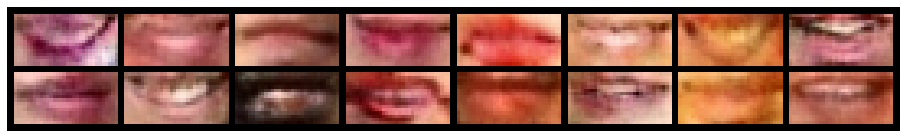

Epoch: [12/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2106, Generator Loss: 2.4223
D(x): 0.8716, D(G(z)): 0.0568
Epoch: [12/20], Batch Num: [1100/1122]
Discriminator Loss: 0.3148, Generator Loss: 2.5137
D(x): 0.7668, D(G(z)): 0.0108
Time taken by 12 epoch(s) is 140.48550295829773.
13
Epoch: [13/20], Batch Num: [0/1122]
Discriminator Loss: 0.1318, Generator Loss: 4.3179
D(x): 0.9484, D(G(z)): 0.0712
torch.Size([16, 100])


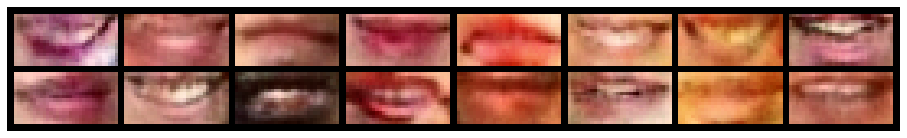

Epoch: [13/20], Batch Num: [50/1122]
Discriminator Loss: 0.1576, Generator Loss: 3.4619
D(x): 0.9526, D(G(z)): 0.0947
Epoch: [13/20], Batch Num: [100/1122]
Discriminator Loss: 0.4343, Generator Loss: 3.1822
D(x): 0.9757, D(G(z)): 0.2822
Epoch: [13/20], Batch Num: [150/1122]
Discriminator Loss: 0.2833, Generator Loss: 2.2385
D(x): 0.8546, D(G(z)): 0.1024
Epoch: [13/20], Batch Num: [200/1122]
Discriminator Loss: 0.1689, Generator Loss: 2.7097
D(x): 0.8964, D(G(z)): 0.0448
Epoch: [13/20], Batch Num: [250/1122]
Discriminator Loss: 0.2487, Generator Loss: 3.8085
D(x): 0.9284, D(G(z)): 0.1349
Epoch: [13/20], Batch Num: [300/1122]
Discriminator Loss: 0.9783, Generator Loss: 5.7931
D(x): 0.9921, D(G(z)): 0.5489
Epoch: [13/20], Batch Num: [350/1122]
Discriminator Loss: 0.1553, Generator Loss: 4.9531
D(x): 0.8847, D(G(z)): 0.0249
Epoch: [13/20], Batch Num: [400/1122]
Discriminator Loss: 0.1620, Generator Loss: 2.9210
D(x): 0.8882, D(G(z)): 0.0283
Epoch: [13/20], Batch Num: [450/1122]
Discriminat

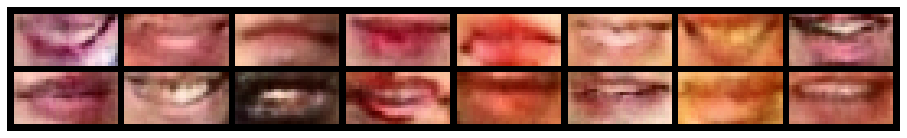

Epoch: [13/20], Batch Num: [550/1122]
Discriminator Loss: 0.1216, Generator Loss: 4.2471
D(x): 0.9411, D(G(z)): 0.0550
Epoch: [13/20], Batch Num: [600/1122]
Discriminator Loss: 0.1829, Generator Loss: 3.2947
D(x): 0.9161, D(G(z)): 0.0807
Epoch: [13/20], Batch Num: [650/1122]
Discriminator Loss: 0.2025, Generator Loss: 2.4433
D(x): 0.8598, D(G(z)): 0.0376
Epoch: [13/20], Batch Num: [700/1122]
Discriminator Loss: 0.0784, Generator Loss: 4.6305
D(x): 0.9986, D(G(z)): 0.0680
Epoch: [13/20], Batch Num: [750/1122]
Discriminator Loss: 0.2716, Generator Loss: 4.1542
D(x): 0.9046, D(G(z)): 0.1290
Epoch: [13/20], Batch Num: [800/1122]
Discriminator Loss: 0.2581, Generator Loss: 3.8558
D(x): 0.9820, D(G(z)): 0.1909
Epoch: [13/20], Batch Num: [850/1122]
Discriminator Loss: 0.6910, Generator Loss: 6.6760
D(x): 0.9868, D(G(z)): 0.4189
Epoch: [13/20], Batch Num: [900/1122]
Discriminator Loss: 0.1290, Generator Loss: 2.7317
D(x): 0.9115, D(G(z)): 0.0314
Epoch: [13/20], Batch Num: [950/1122]
Discrimina

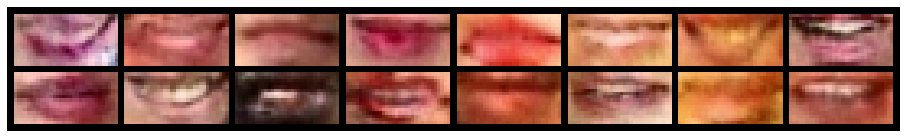

Epoch: [13/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2059, Generator Loss: 2.9432
D(x): 0.9048, D(G(z)): 0.0784
Epoch: [13/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1854, Generator Loss: 3.2347
D(x): 0.8841, D(G(z)): 0.0511
Time taken by 13 epoch(s) is 140.70623517036438.
14
Epoch: [14/20], Batch Num: [0/1122]
Discriminator Loss: 0.1994, Generator Loss: 2.8040
D(x): 0.8530, D(G(z)): 0.0252
torch.Size([16, 100])


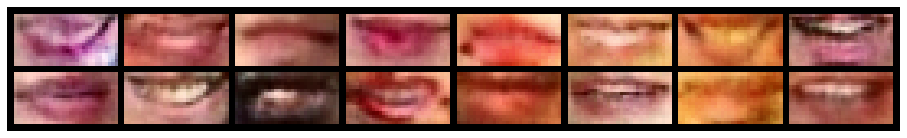

Epoch: [14/20], Batch Num: [50/1122]
Discriminator Loss: 0.2198, Generator Loss: 3.9977
D(x): 0.9561, D(G(z)): 0.1486
Epoch: [14/20], Batch Num: [100/1122]
Discriminator Loss: 0.0995, Generator Loss: 3.7073
D(x): 0.9742, D(G(z)): 0.0649
Epoch: [14/20], Batch Num: [150/1122]
Discriminator Loss: 0.3024, Generator Loss: 2.4639
D(x): 0.7704, D(G(z)): 0.0109
Epoch: [14/20], Batch Num: [200/1122]
Discriminator Loss: 0.1122, Generator Loss: 3.4157
D(x): 0.9543, D(G(z)): 0.0595
Epoch: [14/20], Batch Num: [250/1122]
Discriminator Loss: 0.1579, Generator Loss: 2.9554
D(x): 0.8980, D(G(z)): 0.0395
Epoch: [14/20], Batch Num: [300/1122]
Discriminator Loss: 0.3539, Generator Loss: 2.5654
D(x): 0.9561, D(G(z)): 0.2359
Epoch: [14/20], Batch Num: [350/1122]
Discriminator Loss: 0.1250, Generator Loss: 4.7226
D(x): 0.9132, D(G(z)): 0.0269
Epoch: [14/20], Batch Num: [400/1122]
Discriminator Loss: 0.1925, Generator Loss: 3.5294
D(x): 0.8807, D(G(z)): 0.0508
Epoch: [14/20], Batch Num: [450/1122]
Discriminat

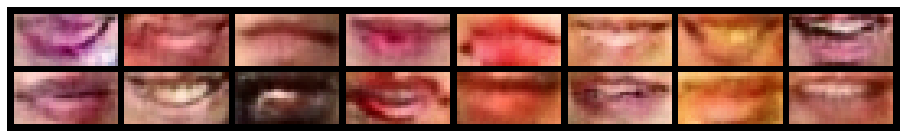

Epoch: [14/20], Batch Num: [550/1122]
Discriminator Loss: 0.1208, Generator Loss: 4.3703
D(x): 0.9775, D(G(z)): 0.0883
Epoch: [14/20], Batch Num: [600/1122]
Discriminator Loss: 0.1421, Generator Loss: 3.4276
D(x): 0.9293, D(G(z)): 0.0576
Epoch: [14/20], Batch Num: [650/1122]
Discriminator Loss: 0.2497, Generator Loss: 5.0580
D(x): 0.9309, D(G(z)): 0.1505
Epoch: [14/20], Batch Num: [700/1122]
Discriminator Loss: 0.0856, Generator Loss: 4.6680
D(x): 0.9984, D(G(z)): 0.0779
Epoch: [14/20], Batch Num: [750/1122]
Discriminator Loss: 0.1639, Generator Loss: 3.4553
D(x): 0.9790, D(G(z)): 0.1212
Epoch: [14/20], Batch Num: [800/1122]
Discriminator Loss: 0.3099, Generator Loss: 4.4226
D(x): 0.9934, D(G(z)): 0.2250
Epoch: [14/20], Batch Num: [850/1122]
Discriminator Loss: 0.8804, Generator Loss: 5.6739
D(x): 0.9669, D(G(z)): 0.5096
Epoch: [14/20], Batch Num: [900/1122]
Discriminator Loss: 0.1732, Generator Loss: 3.5316
D(x): 0.9365, D(G(z)): 0.0909
Epoch: [14/20], Batch Num: [950/1122]
Discrimina

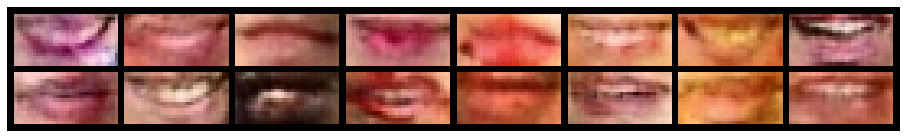

Epoch: [14/20], Batch Num: [1050/1122]
Discriminator Loss: 0.1957, Generator Loss: 2.1755
D(x): 0.8637, D(G(z)): 0.0381
Epoch: [14/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1734, Generator Loss: 2.9631
D(x): 0.9178, D(G(z)): 0.0685
Time taken by 14 epoch(s) is 140.21888303756714.
15
Epoch: [15/20], Batch Num: [0/1122]
Discriminator Loss: 0.1811, Generator Loss: 3.0337
D(x): 0.8564, D(G(z)): 0.0121
torch.Size([16, 100])


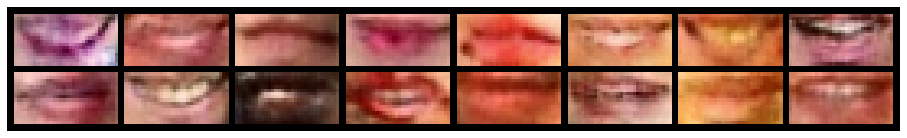

Epoch: [15/20], Batch Num: [50/1122]
Discriminator Loss: 0.1332, Generator Loss: 3.4420
D(x): 0.9238, D(G(z)): 0.0440
Epoch: [15/20], Batch Num: [100/1122]
Discriminator Loss: 0.2994, Generator Loss: 2.8820
D(x): 0.9320, D(G(z)): 0.1715
Epoch: [15/20], Batch Num: [150/1122]
Discriminator Loss: 0.3729, Generator Loss: 1.9149
D(x): 0.7433, D(G(z)): 0.0363
Epoch: [15/20], Batch Num: [200/1122]
Discriminator Loss: 0.1898, Generator Loss: 3.4376
D(x): 0.9042, D(G(z)): 0.0622
Epoch: [15/20], Batch Num: [250/1122]
Discriminator Loss: 0.1834, Generator Loss: 3.2020
D(x): 0.9300, D(G(z)): 0.0848
Epoch: [15/20], Batch Num: [300/1122]
Discriminator Loss: 0.4137, Generator Loss: 3.9705
D(x): 0.9709, D(G(z)): 0.2769
Epoch: [15/20], Batch Num: [350/1122]
Discriminator Loss: 0.1481, Generator Loss: 4.3639
D(x): 0.9708, D(G(z)): 0.1016
Epoch: [15/20], Batch Num: [400/1122]
Discriminator Loss: 0.1447, Generator Loss: 3.6376
D(x): 0.9774, D(G(z)): 0.1082
Epoch: [15/20], Batch Num: [450/1122]
Discriminat

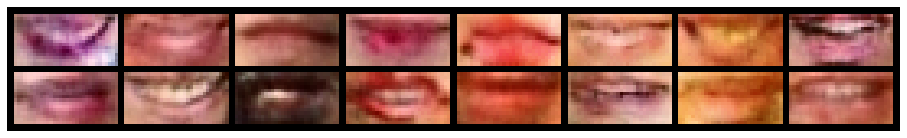

Epoch: [15/20], Batch Num: [550/1122]
Discriminator Loss: 0.1051, Generator Loss: 3.9744
D(x): 0.9620, D(G(z)): 0.0583
Epoch: [15/20], Batch Num: [600/1122]
Discriminator Loss: 0.1382, Generator Loss: 3.4765
D(x): 0.9669, D(G(z)): 0.0923
Epoch: [15/20], Batch Num: [650/1122]
Discriminator Loss: 0.2833, Generator Loss: 2.2555
D(x): 0.8093, D(G(z)): 0.0442
Epoch: [15/20], Batch Num: [700/1122]
Discriminator Loss: 0.0885, Generator Loss: 3.7655
D(x): 0.9979, D(G(z)): 0.0790
Epoch: [15/20], Batch Num: [750/1122]
Discriminator Loss: 0.1813, Generator Loss: 4.3481
D(x): 0.9176, D(G(z)): 0.0771
Epoch: [15/20], Batch Num: [800/1122]
Discriminator Loss: 0.1015, Generator Loss: 4.1520
D(x): 0.9734, D(G(z)): 0.0684
Epoch: [15/20], Batch Num: [850/1122]
Discriminator Loss: 1.1379, Generator Loss: 7.9813
D(x): 0.9956, D(G(z)): 0.5920
Epoch: [15/20], Batch Num: [900/1122]
Discriminator Loss: 0.1840, Generator Loss: 3.2197
D(x): 0.8790, D(G(z)): 0.0411
Epoch: [15/20], Batch Num: [950/1122]
Discrimina

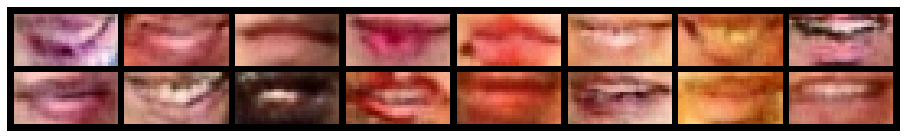

Epoch: [15/20], Batch Num: [1050/1122]
Discriminator Loss: 0.1799, Generator Loss: 2.5797
D(x): 0.8763, D(G(z)): 0.0296
Epoch: [15/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1021, Generator Loss: 2.7572
D(x): 0.9321, D(G(z)): 0.0272
Time taken by 15 epoch(s) is 140.23865246772766.
16
Epoch: [16/20], Batch Num: [0/1122]
Discriminator Loss: 0.1303, Generator Loss: 3.3327
D(x): 0.9276, D(G(z)): 0.0458
torch.Size([16, 100])


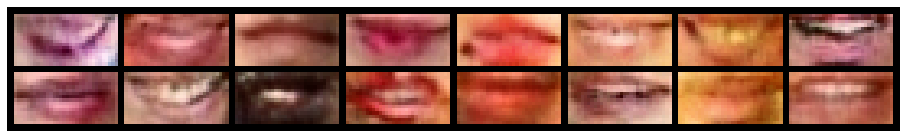

Epoch: [16/20], Batch Num: [50/1122]
Discriminator Loss: 0.1851, Generator Loss: 3.8350
D(x): 0.9585, D(G(z)): 0.1212
Epoch: [16/20], Batch Num: [100/1122]
Discriminator Loss: 0.1407, Generator Loss: 4.0024
D(x): 0.9838, D(G(z)): 0.1087
Epoch: [16/20], Batch Num: [150/1122]
Discriminator Loss: 0.1377, Generator Loss: 5.0657
D(x): 0.9412, D(G(z)): 0.0684
Epoch: [16/20], Batch Num: [200/1122]
Discriminator Loss: 0.4449, Generator Loss: 1.8022
D(x): 0.7557, D(G(z)): 0.1071
Epoch: [16/20], Batch Num: [250/1122]
Discriminator Loss: 0.4207, Generator Loss: 6.4945
D(x): 0.9879, D(G(z)): 0.2999
Epoch: [16/20], Batch Num: [300/1122]
Discriminator Loss: 0.6081, Generator Loss: 3.7802
D(x): 0.9965, D(G(z)): 0.4035
Epoch: [16/20], Batch Num: [350/1122]
Discriminator Loss: 2.4582, Generator Loss: 0.5521
D(x): 0.1773, D(G(z)): 0.0016
Epoch: [16/20], Batch Num: [400/1122]
Discriminator Loss: 0.1615, Generator Loss: 4.2787
D(x): 0.9623, D(G(z)): 0.1060
Epoch: [16/20], Batch Num: [450/1122]
Discriminat

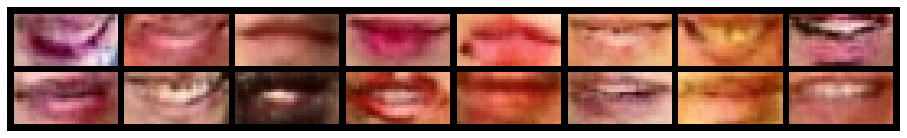

Epoch: [16/20], Batch Num: [550/1122]
Discriminator Loss: 0.1317, Generator Loss: 3.6847
D(x): 0.9763, D(G(z)): 0.0947
Epoch: [16/20], Batch Num: [600/1122]
Discriminator Loss: 0.1352, Generator Loss: 3.3569
D(x): 0.9603, D(G(z)): 0.0813
Epoch: [16/20], Batch Num: [650/1122]
Discriminator Loss: 1.5726, Generator Loss: 0.2483
D(x): 0.2942, D(G(z)): 0.0011
Epoch: [16/20], Batch Num: [700/1122]
Discriminator Loss: 0.1884, Generator Loss: 3.7640
D(x): 0.9963, D(G(z)): 0.1574
Epoch: [16/20], Batch Num: [750/1122]
Discriminator Loss: 0.2675, Generator Loss: 5.1525
D(x): 0.9702, D(G(z)): 0.1923
Epoch: [16/20], Batch Num: [800/1122]
Discriminator Loss: 0.1603, Generator Loss: 4.3876
D(x): 0.9922, D(G(z)): 0.1320
Epoch: [16/20], Batch Num: [850/1122]
Discriminator Loss: 0.7111, Generator Loss: 3.4462
D(x): 0.9688, D(G(z)): 0.4442
Epoch: [16/20], Batch Num: [900/1122]
Discriminator Loss: 0.5462, Generator Loss: 5.4000
D(x): 0.9949, D(G(z)): 0.3623
Epoch: [16/20], Batch Num: [950/1122]
Discrimina

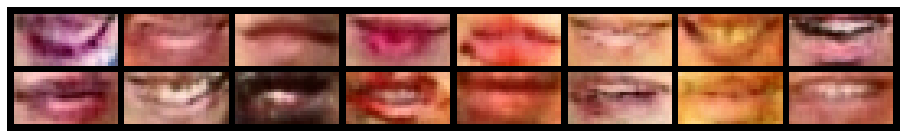

Epoch: [16/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2353, Generator Loss: 2.2053
D(x): 0.8357, D(G(z)): 0.0296
Epoch: [16/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1382, Generator Loss: 2.1005
D(x): 0.9086, D(G(z)): 0.0345
Time taken by 16 epoch(s) is 139.31297755241394.
17
Epoch: [17/20], Batch Num: [0/1122]
Discriminator Loss: 0.1006, Generator Loss: 3.2105
D(x): 0.9432, D(G(z)): 0.0379
torch.Size([16, 100])


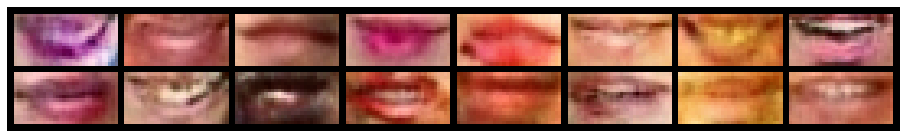

Epoch: [17/20], Batch Num: [50/1122]
Discriminator Loss: 0.1112, Generator Loss: 3.0014
D(x): 0.9515, D(G(z)): 0.0507
Epoch: [17/20], Batch Num: [100/1122]
Discriminator Loss: 0.0863, Generator Loss: 4.0187
D(x): 0.9343, D(G(z)): 0.0147
Epoch: [17/20], Batch Num: [150/1122]
Discriminator Loss: 0.1002, Generator Loss: 4.4699
D(x): 0.9249, D(G(z)): 0.0187
Epoch: [17/20], Batch Num: [200/1122]
Discriminator Loss: 0.1379, Generator Loss: 3.8443
D(x): 0.9429, D(G(z)): 0.0689
Epoch: [17/20], Batch Num: [250/1122]
Discriminator Loss: 0.2255, Generator Loss: 2.6086
D(x): 0.9280, D(G(z)): 0.1196
Epoch: [17/20], Batch Num: [300/1122]
Discriminator Loss: 0.2973, Generator Loss: 3.2310
D(x): 0.9624, D(G(z)): 0.2016
Epoch: [17/20], Batch Num: [350/1122]
Discriminator Loss: 0.1127, Generator Loss: 4.0086
D(x): 0.9356, D(G(z)): 0.0398
Epoch: [17/20], Batch Num: [400/1122]
Discriminator Loss: 0.1467, Generator Loss: 4.5118
D(x): 0.9728, D(G(z)): 0.1042
Epoch: [17/20], Batch Num: [450/1122]
Discriminat

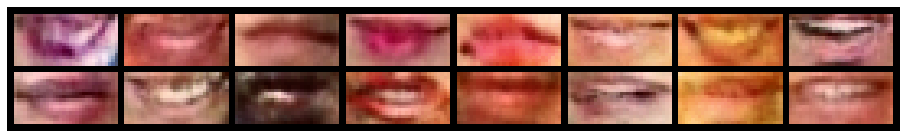

Epoch: [17/20], Batch Num: [550/1122]
Discriminator Loss: 0.1241, Generator Loss: 3.8313
D(x): 0.9299, D(G(z)): 0.0448
Epoch: [17/20], Batch Num: [600/1122]
Discriminator Loss: 0.1606, Generator Loss: 3.2007
D(x): 0.9309, D(G(z)): 0.0783
Epoch: [17/20], Batch Num: [650/1122]
Discriminator Loss: 0.1644, Generator Loss: 3.7107
D(x): 0.9493, D(G(z)): 0.0936
Epoch: [17/20], Batch Num: [700/1122]
Discriminator Loss: 0.1065, Generator Loss: 5.1968
D(x): 0.9981, D(G(z)): 0.0943
Epoch: [17/20], Batch Num: [750/1122]
Discriminator Loss: 0.1991, Generator Loss: 5.3669
D(x): 0.9785, D(G(z)): 0.1480
Epoch: [17/20], Batch Num: [800/1122]
Discriminator Loss: 0.1301, Generator Loss: 5.6755
D(x): 0.9849, D(G(z)): 0.1032
Epoch: [17/20], Batch Num: [850/1122]
Discriminator Loss: 0.3941, Generator Loss: 0.9806
D(x): 0.8295, D(G(z)): 0.1351
Epoch: [17/20], Batch Num: [900/1122]
Discriminator Loss: 0.1175, Generator Loss: 3.5389
D(x): 0.9273, D(G(z)): 0.0357
Epoch: [17/20], Batch Num: [950/1122]
Discrimina

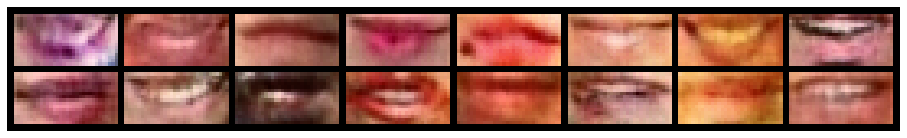

Epoch: [17/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2591, Generator Loss: 2.3727
D(x): 0.8367, D(G(z)): 0.0575
Epoch: [17/20], Batch Num: [1100/1122]
Discriminator Loss: 0.1609, Generator Loss: 2.4238
D(x): 0.8946, D(G(z)): 0.0375
Time taken by 17 epoch(s) is 140.24632859230042.
18
Epoch: [18/20], Batch Num: [0/1122]
Discriminator Loss: 0.0979, Generator Loss: 3.8745
D(x): 0.9428, D(G(z)): 0.0351
torch.Size([16, 100])


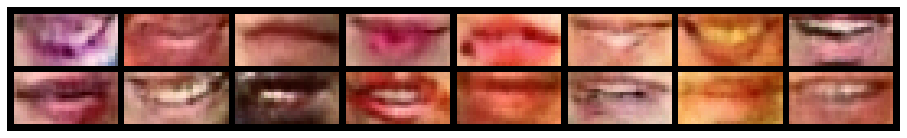

Epoch: [18/20], Batch Num: [50/1122]
Discriminator Loss: 0.1686, Generator Loss: 4.4467
D(x): 0.9715, D(G(z)): 0.1201
Epoch: [18/20], Batch Num: [100/1122]
Discriminator Loss: 0.3613, Generator Loss: 3.2944
D(x): 0.9684, D(G(z)): 0.2478
Epoch: [18/20], Batch Num: [150/1122]
Discriminator Loss: 0.1684, Generator Loss: 2.8925
D(x): 0.8701, D(G(z)): 0.0122
Epoch: [18/20], Batch Num: [200/1122]
Discriminator Loss: 0.1424, Generator Loss: 4.0102
D(x): 0.9455, D(G(z)): 0.0679
Epoch: [18/20], Batch Num: [250/1122]
Discriminator Loss: 0.4088, Generator Loss: 3.5413
D(x): 0.8889, D(G(z)): 0.2161
Epoch: [18/20], Batch Num: [300/1122]
Discriminator Loss: 0.2339, Generator Loss: 2.2621
D(x): 0.9839, D(G(z)): 0.1709
Epoch: [18/20], Batch Num: [350/1122]
Discriminator Loss: 0.1445, Generator Loss: 4.3859
D(x): 0.8937, D(G(z)): 0.0215
Epoch: [18/20], Batch Num: [400/1122]
Discriminator Loss: 0.1564, Generator Loss: 4.0811
D(x): 0.9683, D(G(z)): 0.1058
Epoch: [18/20], Batch Num: [450/1122]
Discriminat

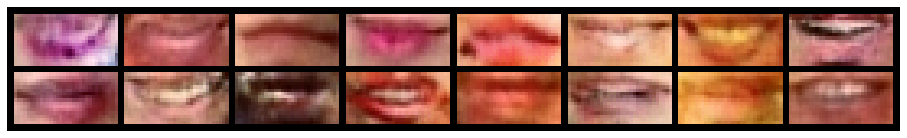

Epoch: [18/20], Batch Num: [550/1122]
Discriminator Loss: 0.1951, Generator Loss: 4.3011
D(x): 0.9323, D(G(z)): 0.1036
Epoch: [18/20], Batch Num: [600/1122]
Discriminator Loss: 0.1337, Generator Loss: 3.6277
D(x): 0.9232, D(G(z)): 0.0466
Epoch: [18/20], Batch Num: [650/1122]
Discriminator Loss: 0.2555, Generator Loss: 2.0667
D(x): 0.8263, D(G(z)): 0.0389
Epoch: [18/20], Batch Num: [700/1122]
Discriminator Loss: 0.0598, Generator Loss: 3.5036
D(x): 0.9978, D(G(z)): 0.0538
Epoch: [18/20], Batch Num: [750/1122]
Discriminator Loss: 0.1346, Generator Loss: 3.7979
D(x): 0.9658, D(G(z)): 0.0895
Epoch: [18/20], Batch Num: [800/1122]
Discriminator Loss: 0.0718, Generator Loss: 3.1573
D(x): 0.9837, D(G(z)): 0.0516
Epoch: [18/20], Batch Num: [850/1122]
Discriminator Loss: 0.1754, Generator Loss: 3.4092
D(x): 0.9338, D(G(z)): 0.0883
Epoch: [18/20], Batch Num: [900/1122]
Discriminator Loss: 0.1704, Generator Loss: 2.7520
D(x): 0.8655, D(G(z)): 0.0111
Epoch: [18/20], Batch Num: [950/1122]
Discrimina

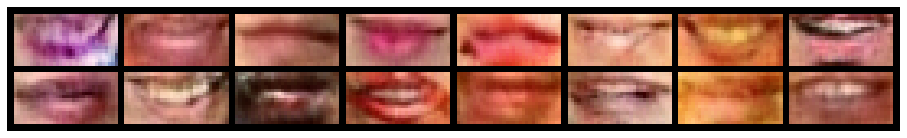

Epoch: [18/20], Batch Num: [1050/1122]
Discriminator Loss: 0.1566, Generator Loss: 2.9259
D(x): 0.8928, D(G(z)): 0.0336
Epoch: [18/20], Batch Num: [1100/1122]
Discriminator Loss: 0.2599, Generator Loss: 4.9549
D(x): 0.9365, D(G(z)): 0.1402
Time taken by 18 epoch(s) is 140.0607213973999.
19
Epoch: [19/20], Batch Num: [0/1122]
Discriminator Loss: 0.0866, Generator Loss: 3.3546
D(x): 0.9414, D(G(z)): 0.0217
torch.Size([16, 100])


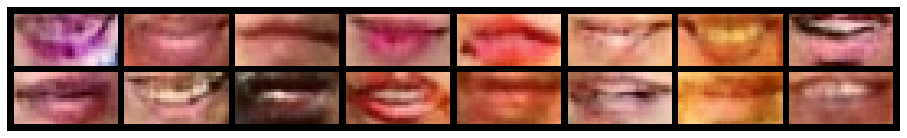

Epoch: [19/20], Batch Num: [50/1122]
Discriminator Loss: 0.1400, Generator Loss: 3.8336
D(x): 0.9802, D(G(z)): 0.1046
Epoch: [19/20], Batch Num: [100/1122]
Discriminator Loss: 0.0987, Generator Loss: 2.7708
D(x): 0.9692, D(G(z)): 0.0609
Epoch: [19/20], Batch Num: [150/1122]
Discriminator Loss: 0.1048, Generator Loss: 3.9789
D(x): 0.9226, D(G(z)): 0.0191
Epoch: [19/20], Batch Num: [200/1122]
Discriminator Loss: 0.0983, Generator Loss: 4.0047
D(x): 0.9543, D(G(z)): 0.0374
Epoch: [19/20], Batch Num: [250/1122]
Discriminator Loss: 0.1489, Generator Loss: 3.7606
D(x): 0.9524, D(G(z)): 0.0820
Epoch: [19/20], Batch Num: [300/1122]
Discriminator Loss: 0.2985, Generator Loss: 1.1402
D(x): 0.8481, D(G(z)): 0.0904
Epoch: [19/20], Batch Num: [350/1122]
Discriminator Loss: 0.1960, Generator Loss: 3.8034
D(x): 0.9226, D(G(z)): 0.0961
Epoch: [19/20], Batch Num: [400/1122]
Discriminator Loss: 0.1186, Generator Loss: 3.1904
D(x): 0.9643, D(G(z)): 0.0726
Epoch: [19/20], Batch Num: [450/1122]
Discriminat

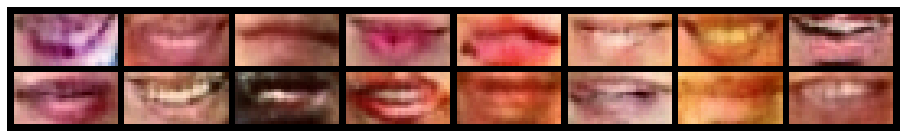

Epoch: [19/20], Batch Num: [550/1122]
Discriminator Loss: 0.1754, Generator Loss: 5.0798
D(x): 0.9890, D(G(z)): 0.1412
Epoch: [19/20], Batch Num: [600/1122]
Discriminator Loss: 0.1083, Generator Loss: 3.6388
D(x): 0.9320, D(G(z)): 0.0315
Epoch: [19/20], Batch Num: [650/1122]
Discriminator Loss: 0.3668, Generator Loss: 2.7975
D(x): 0.8375, D(G(z)): 0.1384
Epoch: [19/20], Batch Num: [700/1122]
Discriminator Loss: 0.0274, Generator Loss: 5.7090
D(x): 0.9960, D(G(z)): 0.0224
Epoch: [19/20], Batch Num: [750/1122]
Discriminator Loss: 0.1201, Generator Loss: 3.7563
D(x): 0.9160, D(G(z)): 0.0207
Epoch: [19/20], Batch Num: [800/1122]
Discriminator Loss: 6.6871, Generator Loss: 1.8911
D(x): 0.0059, D(G(z)): 0.0006
Epoch: [19/20], Batch Num: [850/1122]
Discriminator Loss: 0.2677, Generator Loss: 2.7294
D(x): 0.9093, D(G(z)): 0.1281
Epoch: [19/20], Batch Num: [900/1122]
Discriminator Loss: 0.1341, Generator Loss: 3.7070
D(x): 0.9116, D(G(z)): 0.0330
Epoch: [19/20], Batch Num: [950/1122]
Discrimina

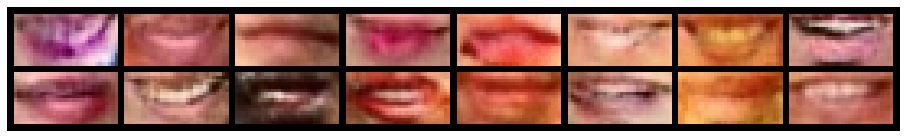

Epoch: [19/20], Batch Num: [1050/1122]
Discriminator Loss: 0.2133, Generator Loss: 2.4600
D(x): 0.8642, D(G(z)): 0.0485
Epoch: [19/20], Batch Num: [1100/1122]
Discriminator Loss: 0.2709, Generator Loss: 5.2111
D(x): 0.9535, D(G(z)): 0.1681
Time taken by 19 epoch(s) is 140.4174177646637.


In [ ]:
# Create logger instance
logger = Logger(model_name='DCGAN', data_name='CelebA')
# Total number of epochs to train
num_epochs = 20
for epoch in range(num_epochs):
    print(epoch)
    start = time.time()
    for n_batch, real_batch in enumerate(data_loader):
        N = real_batch['image'].size(0)
        # 1. Train Discriminator
        real_data = Variable(real_batch['image'])
        real_label = real_batch['label'].float()

        if torch.cuda.is_available():
           real_label = real_label.cuda()
           real_data = real_data.cuda()
        # Generate fake data and detach 
        # (so gradients are not calculated for generator)
        
        fake_data = generator(Noise(N,z_size),real_label).detach()

        # Train D
        d_error, d_pred_real, d_pred_fake = \
              train_discriminator(d_optimizer, real_data, fake_data)


        # 2. Train Generator
        # Generate fake data
        fake_data = generator(Noise(N,z_size),real_label)
        # Train G
        g_error = train_generator(g_optimizer, fake_data)
        # Log batch error
        logger.log(d_error, g_error, epoch, n_batch, num_batches)
        # Display Progress every few batches
        if n_batch%50 == 0:
           # Display status Logs
            logger.display_status(
                epoch, num_epochs, n_batch, num_batches,
                d_error, g_error, d_pred_real, d_pred_fake
            )
            if (n_batch) % 500 == 0: 
                print(test_noise.shape)
                
                test_images = generator(test_noise,test_label.float())
                test_images = test_images.data.cpu()
                logger.log_images(
                    test_images, num_test_samples, 
                    epoch, n_batch, num_batches
                );
    
    end = time.time()
    print("Time taken by {} epoch(s) is {}.".format(epoch,end-start))           

In [ ]:
test_label

tensor([[1, 0, 1],
        [1, 1, 1],
        [0, 1, 1],
        [0, 0, 1],
        [1, 0, 0],
        [1, 1, 0],
        [1, 0, 0],
        [1, 1, 1],
        [1, 0, 0],
        [0, 1, 0],
        [1, 0, 1],
        [0, 1, 0],
        [0, 1, 1],
        [0, 1, 1],
        [1, 1, 1],
        [0, 0, 1]], device='cuda:0')

In [ ]:
checkpoint = {
    'generator':generator,
    'discriminator':discriminator,
    'gen_stat_dict':generator.state_dict(),
    'dis_stat_dict':discriminator.state_dict(),
    'gen_optimizer':g_optimizer.state_dict(),
    'dis_optimizer':d_optimizer.state_dict()
}

In [ ]:
location = '/content/drive/My Drive/ModelWeights/c_mouth_conv_v2.pth'
torch.save(checkpoint,location)

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Discriminator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
model = Generator(3)


In [ ]:
checkpoint = torch.load('/content/drive/My Drive/ModelWeights/c_mouth_conv_v1.pth')

In [ ]:
model.load_state_dict(checkpoint['gen_stat_dict'])

<All keys matched successfully>

In [ ]:
logger = Logger(model_name='DCGAN', data_name='CelebA')
test_images = generator(test_noise,test_label.float())
test_images = test_images.data.cpu()
logger.log_images(
  test_images, num_test_samples, 
                    0, 0, 0
                );